Imaginemos que trabajamos en una empresa de e-commerce que busca optimizar sus estrategias de marketing y fidelización. Al identificar patrones en los datos de clientes que llevan a realizar o no realizar una compra, podremos:

Personalizar las ofertas para los clientes potenciales.
Mejorar la experiencia de compra al enfocarnos en los factores clave que influyen en su decisión.
Maximizar los ingresos al reducir la inversión en clientes con baja probabilidad de compra.

El objetivo será predecir la probabilidad de que un cliente realice una compra (PurchaseStatus) basándonos en sus características demográficas, comportamiento de compra y otras variables relevantes. Esto incluye analizar cómo factores como la edad, el ingreso anual, la cantidad de compras anteriores, la participación en programas de lealtad, y el tiempo que pasan en el sitio web influyen en su decisión de compra.
| Columna              | Descripción                                                                 |
|-----------------------|-----------------------------------------------------------------------------|
| `Age`                  | Edad del cliente.                                                          |
| `Gender `              | Género del cliente.                                                        |
| `AnnualIncome`         | Ingreso anual del cliente.                                                 |
| `NumberOfPurchases`    | Número de compras realizadas por el cliente.                               |
| `ProductCategory  `    | Categoría del producto comprado (por ejemplo, Sports, Electronics, Clothing, etc.). |
| `TimeSpentOnWebsite `  | Tiempo que el cliente pasó en el sitio web (en minutos).                   |
| `LoyaltyProgram `      | Indica si el cliente es parte de un programa de lealtad (Yes/No).          |
| `DiscountsAvailed `    | Número de descuentos aprovechados por el cliente.                          |
| `PurchaseStatus `      | Indica si el cliente completó la compra (Yes/No).                          |

In [1]:
# Tratamiento de datos
# -----------------------------------------------------------------------
import numpy as np
import pandas as pd

# Otros objetivos
# -----------------------------------------------------------------------
import math

# Gráficos
# -----------------------------------------------------------------------
import seaborn as sns
import matplotlib.pyplot as plt

# Para tratar el problema de desbalance
# -----------------------------------------------------------------------
from imblearn.over_sampling import RandomOverSampler, SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.combine import SMOTETomek

# Path configuration for custom module imports  
# -----------------------------------------------------------------------  
import sys  
sys.path.append('../')  # Adds the parent directory to the path for custom module imports  

# Ignore warnings  
# -----------------------------------------------------------------------  
import warnings  
warnings.filterwarnings("ignore") 

from src.support_eda import *

In [2]:
df = pd.read_csv('../data/customer_purchase_data.csv', index_col=0)

In [5]:
df[df['PurchaseStatus'] == 'No'].sort_values(by=['Gender', 'Age', 'AnnualIncome'])

,Age,Gender,AnnualIncome,NumberOfPurchases,ProductCategory,TimeSpentOnWebsite,LoyaltyProgram,DiscountsAvailed,PurchaseStatus
108,18,Female,26716.933816,6,Beauty,29.218736,No,0,No
135,18,Female,34941.289618,4,Clothing,51.118401,No,1,No
52,18,Female,38570.537349,5,Beauty,23.847517,No,5,No
230,18,Female,61002.896447,0,Home Goods,46.836731,No,1,No
1490,18,Female,83126.660956,20,Beauty,2.280306,No,1,No
...,...,...,...,...,...,...,...,...,...
211,70,Male,115856.420060,9,Home Goods,19.042997,No,3,No
71,70,Male,119425.274117,4,Beauty,45.355881,No,5,No
961,70,Male,119425.274117,4,Beauty,45.355881,No,5,No
247,70,Male,123568.581635,5,Beauty,31.130296,Yes,0,No


In [3]:
df.head()

,Age,Gender,AnnualIncome,NumberOfPurchases,ProductCategory,TimeSpentOnWebsite,LoyaltyProgram,DiscountsAvailed,PurchaseStatus
0,40,Female,66120.267939,8,Electronics,30.568601,No,5,Yes
1,20,Female,23579.773583,4,Home Goods,38.240097,No,5,No
2,27,Female,127821.306432,11,Home Goods,31.633212,Yes,0,Yes
3,24,Female,137798.623120,19,Beauty,46.167059,No,4,Yes
4,31,Female,99300.964220,19,Clothing,19.823592,No,0,Yes


### EDA

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1500 entries, 0 to 1499
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Age                 1500 non-null   int64  
 1   Gender              1500 non-null   object 
 2   AnnualIncome        1500 non-null   float64
 3   NumberOfPurchases   1500 non-null   int64  
 4   ProductCategory     1500 non-null   object 
 5   TimeSpentOnWebsite  1500 non-null   float64
 6   LoyaltyProgram      1500 non-null   object 
 7   DiscountsAvailed    1500 non-null   int64  
 8   PurchaseStatus      1500 non-null   object 
dtypes: float64(2), int64(3), object(4)
memory usage: 117.2+ KB


Tenemos un total de 1500 entradas. En principio no parece haber nulos en ninguna columna

In [5]:
df.duplicated().sum()

112

Hay 112 duplicados, vamos a eliminarlos.

In [6]:
df.drop_duplicates(inplace=True)

Comenzamos viendo cómo son las variables numéricas

In [7]:
df.select_dtypes(include=np.number).describe().T.round(2)

,count,mean,std,min,25%,50%,75%,max
Age,1388.0,43.94,15.49,18.00,30.75,44.00,57.00,70.00
AnnualIncome,1388.0,84699.05,37541.14,20001.51,53766.90,84625.29,117188.21,149785.18
NumberOfPurchases,1388.0,10.55,5.87,0.00,6.00,11.00,15.00,20.00
TimeSpentOnWebsite,1388.0,30.75,16.98,1.04,16.38,31.21,44.67,59.99
DiscountsAvailed,1388.0,2.61,1.70,0.00,1.00,3.00,4.00,5.00


* La edad mínima son 18 años y la máxima 70 por lo que tenemos una población adulta en todo el rango de edades. La media y la mediana están muy parejas con un calor de entre 44 y 45 años.

* El salario anual oscila desde 20k hasta 150k, lo cual es un rango realista aunque amplio. La media y la mediana también están parejas en un rango de 83-84k.

* Número de compras va desde 0 hasta 20 con una distribución que parece bastante simétrica, luego lo veremos.

* El tiempo en la web pasa desde 1 min hasta 60 min con una distribución que también parece simétrica en vista de los cuartiles.

* Descuentos va de 0 a 5

Veamos unos boxplots para ver las distribuciones

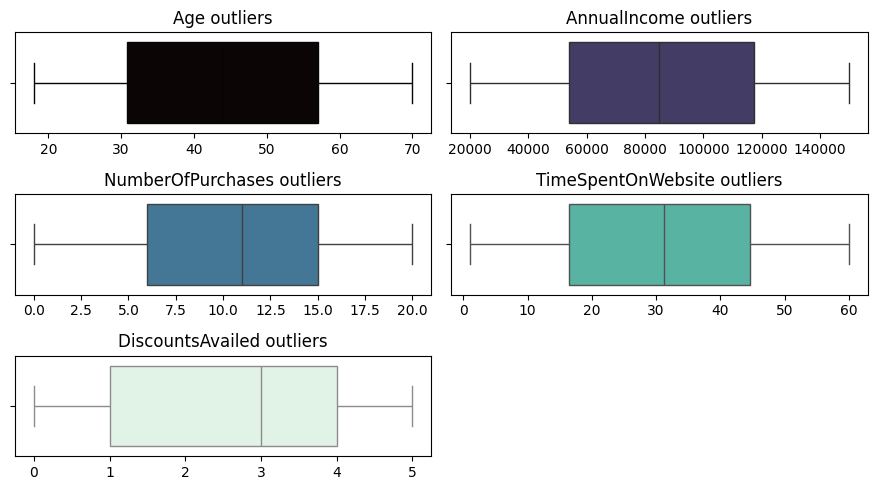

In [8]:
plot_outliers(df)

No nos dicen gran cosa al no haber outliers. Analicemos las variables una a una

### `Age`

In [9]:
value_counts(df, 'Age').head()

,count,proportion
Age,,
50,39,0.03
68,37,0.03
64,36,0.03
66,36,0.03
45,34,0.02


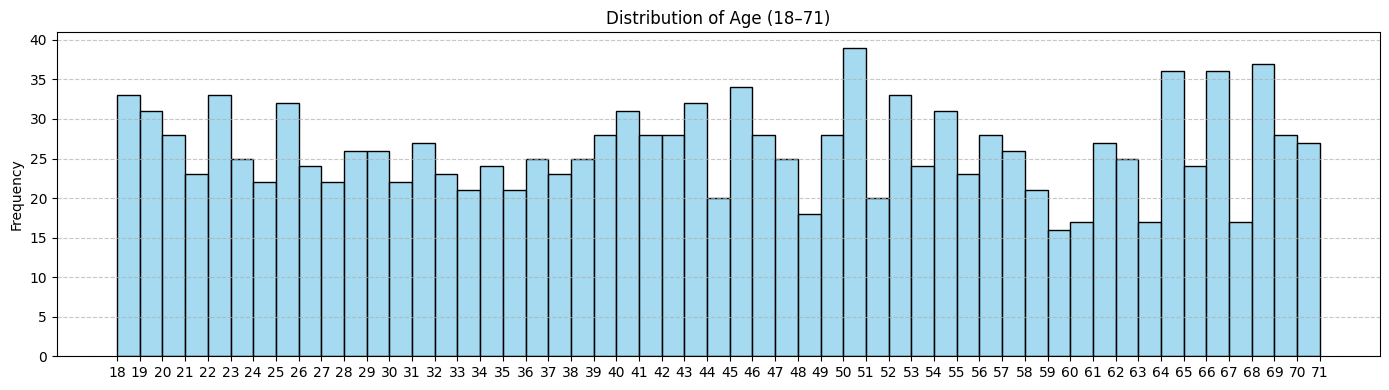

In [10]:
min_ = df['Age'].min()
max_ = df['Age'].max()

plot_numeric_distribution(df, min_, max_+1, 'Age', n = 1, size=(14,4), rotation=0)

La distribución de edades parece bastante uniforme con algunas oscilaciones que no parecen responder a ningún patrón en particular

### `Gender` 

In [11]:
value_counts(df, 'Gender')

,count,proportion
Gender,,
Female,696,0.5
Male,692,0.5


Hay prácticamente la misma cantidad de mujeres que de hombres

### `AnnualIncome`

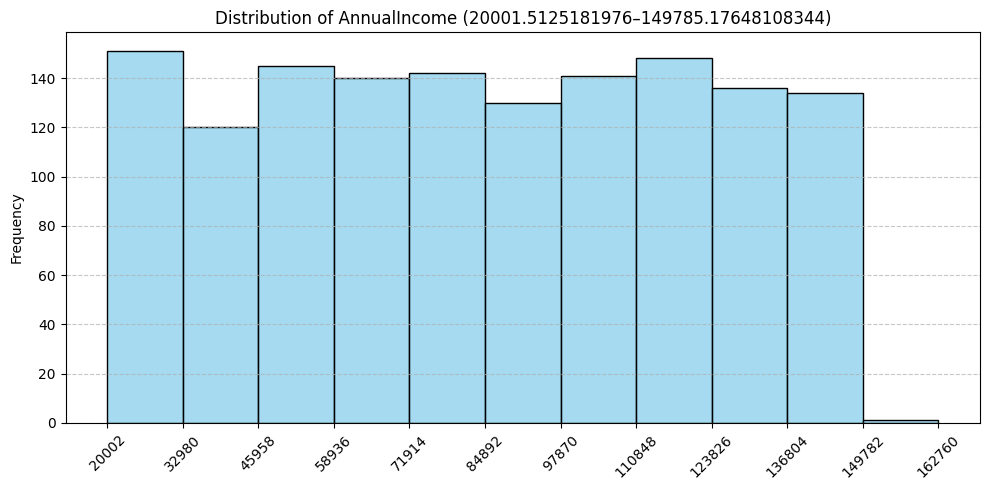

In [12]:
quick_plot_numeric(df, 'AnnualIncome')

La distribución es sorprendentemente homogénea

### `NumberOfPurchases`

In [13]:
value_counts(df, 'NumberOfPurchases').head()

,count,proportion
NumberOfPurchases,,
14,83,0.06
12,81,0.06
16,79,0.06
15,78,0.06
19,77,0.06


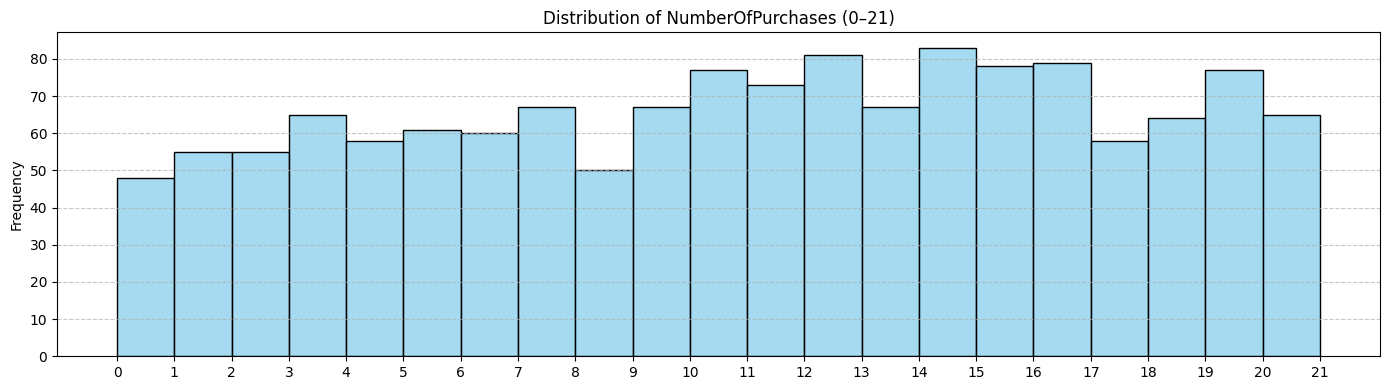

In [14]:
min_ = df['NumberOfPurchases'].min()
max_ = df['NumberOfPurchases'].max()

plot_numeric_distribution(df, min_, max_+1, 'NumberOfPurchases', n = 1, size=(14,4), rotation=0)

También parece homogénea, vaya rollo

### `ProductCategory`

In [15]:
value_counts(df, 'ProductCategory')

,count,proportion
ProductCategory,,
Clothing,306,0.22
Sports,289,0.21
Beauty,270,0.19
Electronics,269,0.19
Home Goods,254,0.18


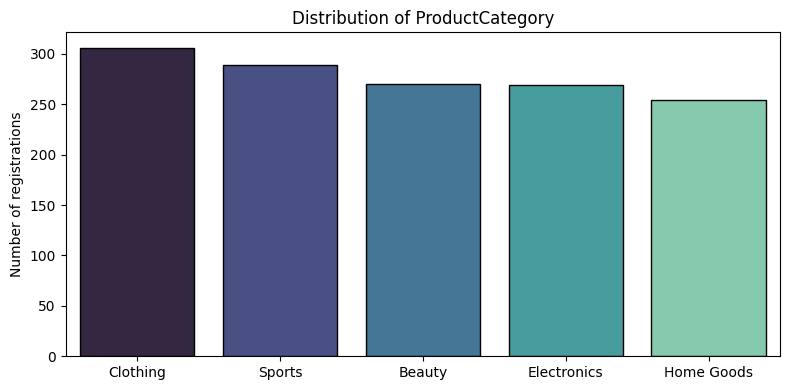

In [16]:
plot_categoric_distribution(df, 'ProductCategory', rotation=0)

También parece ser homogéneo aunque domina la ropa y lo menor es los home goods

### `TimeSpentOnWebsite`

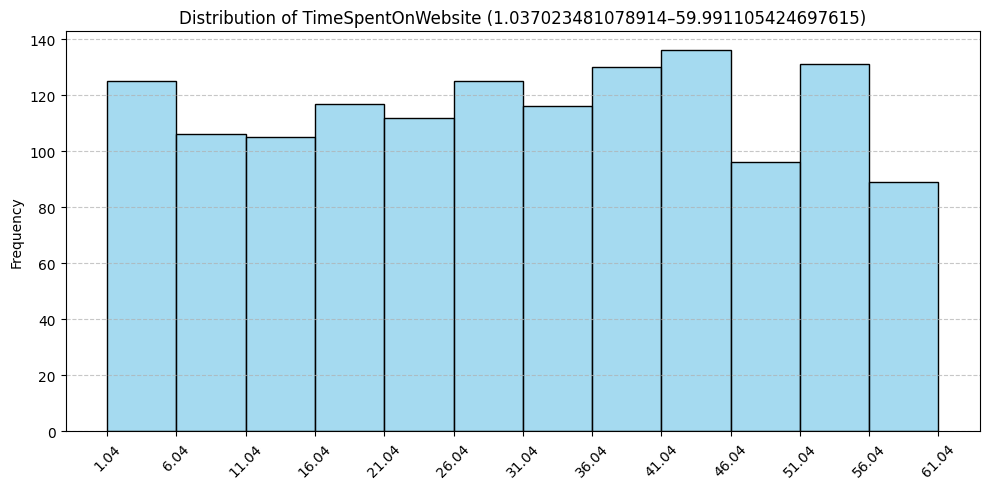

In [17]:
quick_plot_numeric(df, 'TimeSpentOnWebsite')

También bastante homogéneos

### `LoyaltyProgram`

In [18]:
value_counts(df, 'LoyaltyProgram')

,count,proportion
LoyaltyProgram,,
No,925,0.67
Yes,463,0.33


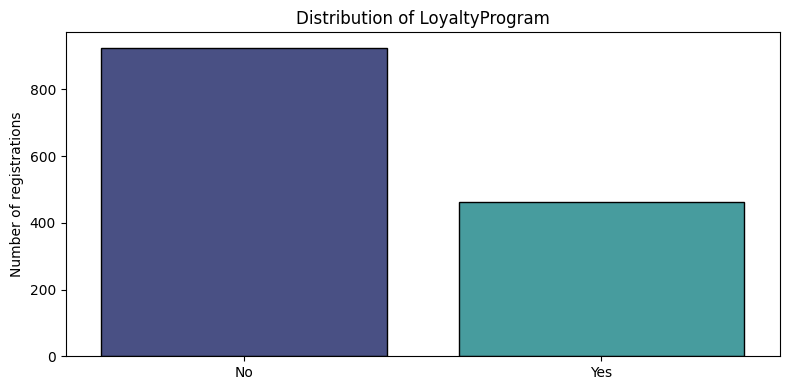

In [19]:
plot_categoric_distribution(df, 'LoyaltyProgram', rotation=0)

El 33% de las personas están en el programa de Loyalty

### `DiscountsAvailed`

In [20]:
value_counts(df, 'DiscountsAvailed')

,count,proportion
DiscountsAvailed,,
4,249,0.18
5,247,0.18
3,246,0.18
1,219,0.16
2,217,0.16
0,210,0.15


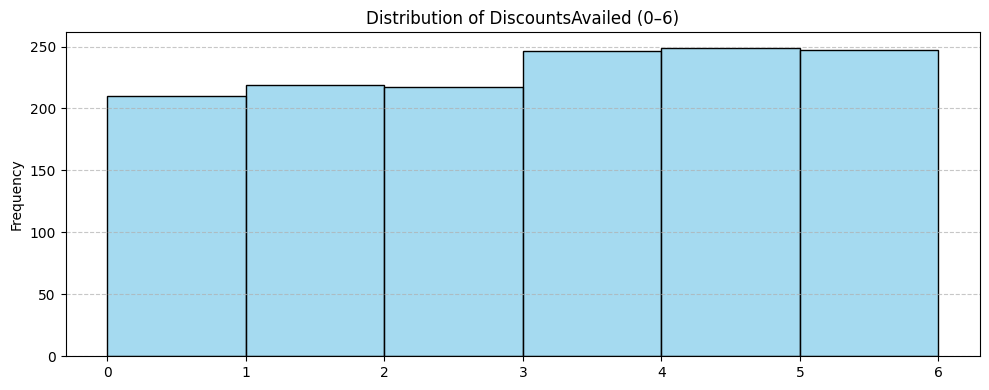

In [21]:
min_ = df['DiscountsAvailed'].min()
max_ = df['DiscountsAvailed'].max()

plot_numeric_distribution(df, min_, max_+1, 'DiscountsAvailed', n = 1, size=(10,4), rotation=0)

También homogéneamente repartido

### `PurchaseStatus`

In [22]:
value_counts(df, 'PurchaseStatus')

,count,proportion
PurchaseStatus,,
No,740,0.53
Yes,648,0.47


El 47% de las personas han comprado

---

Agrupar por `Gender`

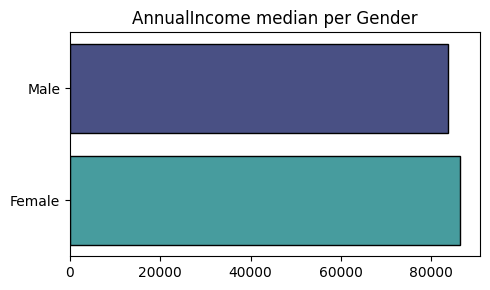

In [23]:
plot_groupby_median(df, 'Gender', 'AnnualIncome', max_entries=2, size=(5,3))

Parece que las mujeres ganan un poco más

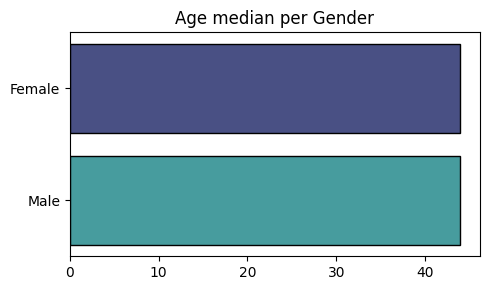

In [24]:
plot_groupby_median(df, 'Gender', 'Age', max_entries=2, size=(5,3))

La edad mediana es prácticamente igual

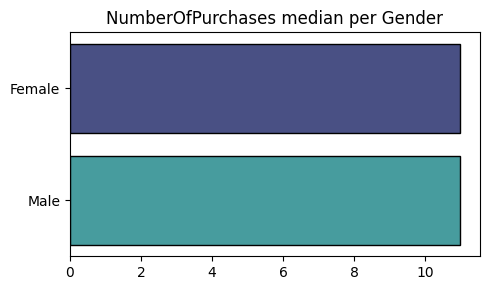

In [25]:
plot_groupby_median(df, 'Gender', 'NumberOfPurchases', max_entries=2, size=(5,3))

Compran lo mismo

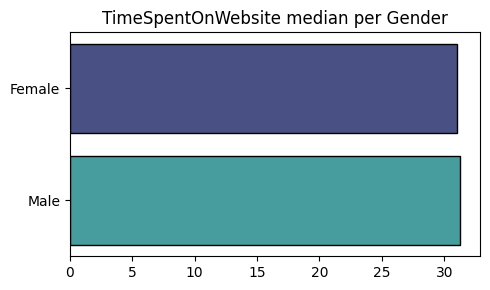

In [26]:
plot_groupby_median(df, 'Gender', 'TimeSpentOnWebsite', max_entries=2, size=(5,3))

Pasan el mismo tiempo en la web

### Agrupar por `LoyaltyProgram`

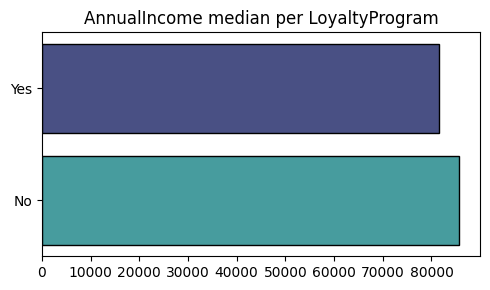

In [27]:
plot_groupby_median(df, 'LoyaltyProgram', 'AnnualIncome', max_entries=2, size=(5,3)) 

Los que no parece que ganan un poco más

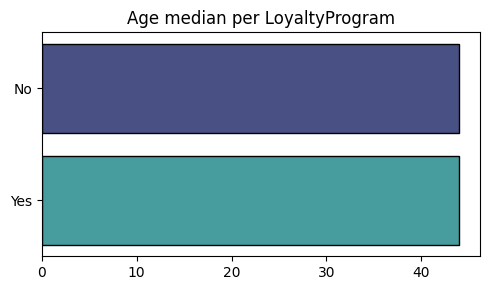

In [28]:
plot_groupby_median(df, 'LoyaltyProgram', 'Age', max_entries=2, size=(5,3)) 

Nada

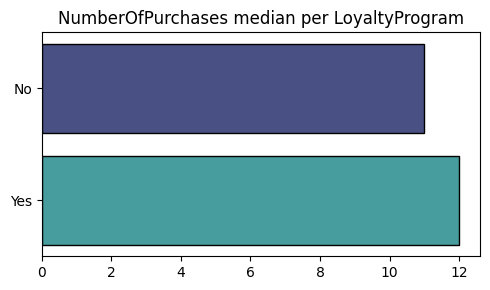

In [29]:
plot_groupby_median(df, 'LoyaltyProgram', 'NumberOfPurchases', max_entries=2, size=(5,3)) 

Los que sí parecen comprar un poco más

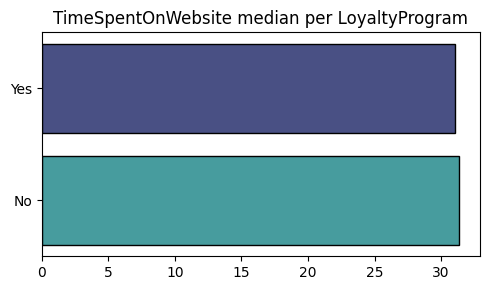

In [30]:
plot_groupby_median(df, 'LoyaltyProgram', 'TimeSpentOnWebsite', max_entries=2, size=(5,3)) 

Nada

### Agrupar por `PurchaseStatus` (VR)

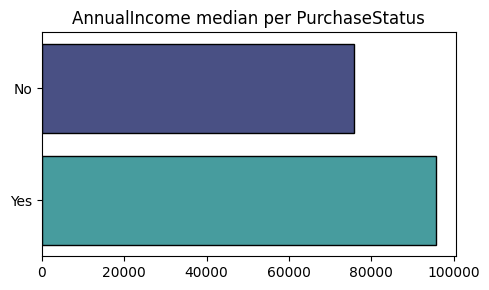

In [31]:
plot_groupby_median(df, 'PurchaseStatus', 'AnnualIncome', max_entries=2, size=(5,3)) 

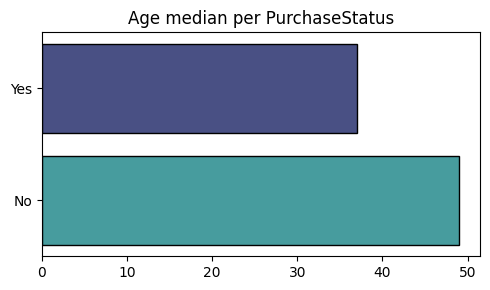

In [32]:
plot_groupby_median(df, 'PurchaseStatus', 'Age', max_entries=2, size=(5,3)) 

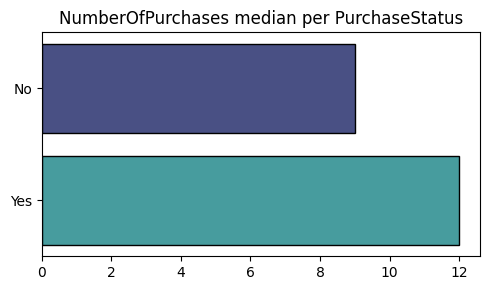

In [33]:
plot_groupby_median(df, 'PurchaseStatus', 'NumberOfPurchases', max_entries=2, size=(5,3)) 

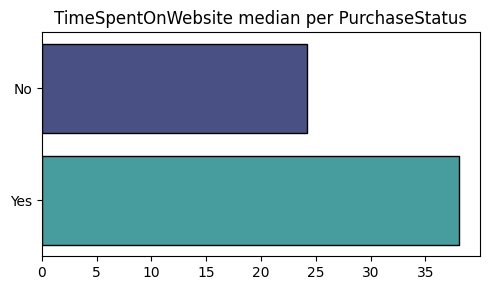

In [34]:
plot_groupby_median(df, 'PurchaseStatus', 'TimeSpentOnWebsite', max_entries=2, size=(5,3)) 

Compran y ganan más los que sí han comprado, también tienen más edad y pasan más tiempo en la web

---

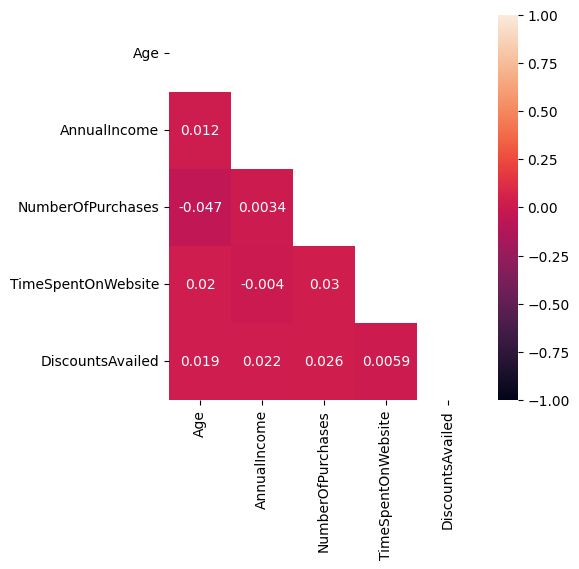

In [35]:
plot_correlation_matrix(df)

Nada se correlaciona

Veamos la comparación entre variables numéricas

In [36]:
df.columns

Index(['Age', 'Gender', 'AnnualIncome', 'NumberOfPurchases', 'ProductCategory',
       'TimeSpentOnWebsite', 'LoyaltyProgram', 'DiscountsAvailed',
       'PurchaseStatus'],
      dtype='object')

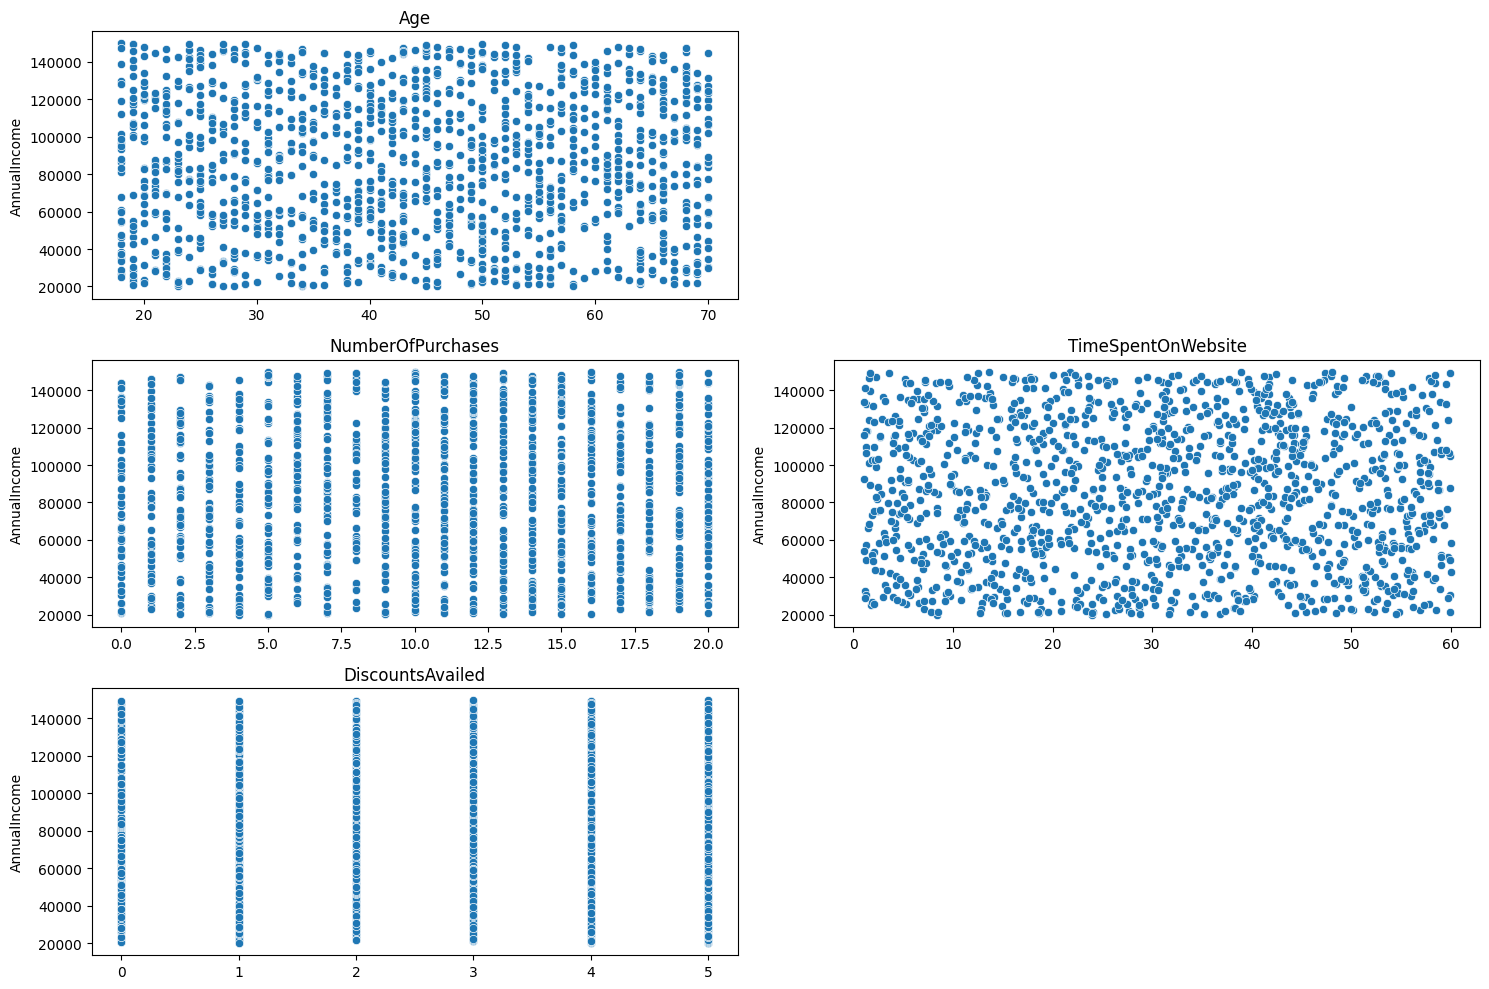

In [37]:
plot_relation_tv_numeric(df, 'AnnualIncome', size = (15, 10))

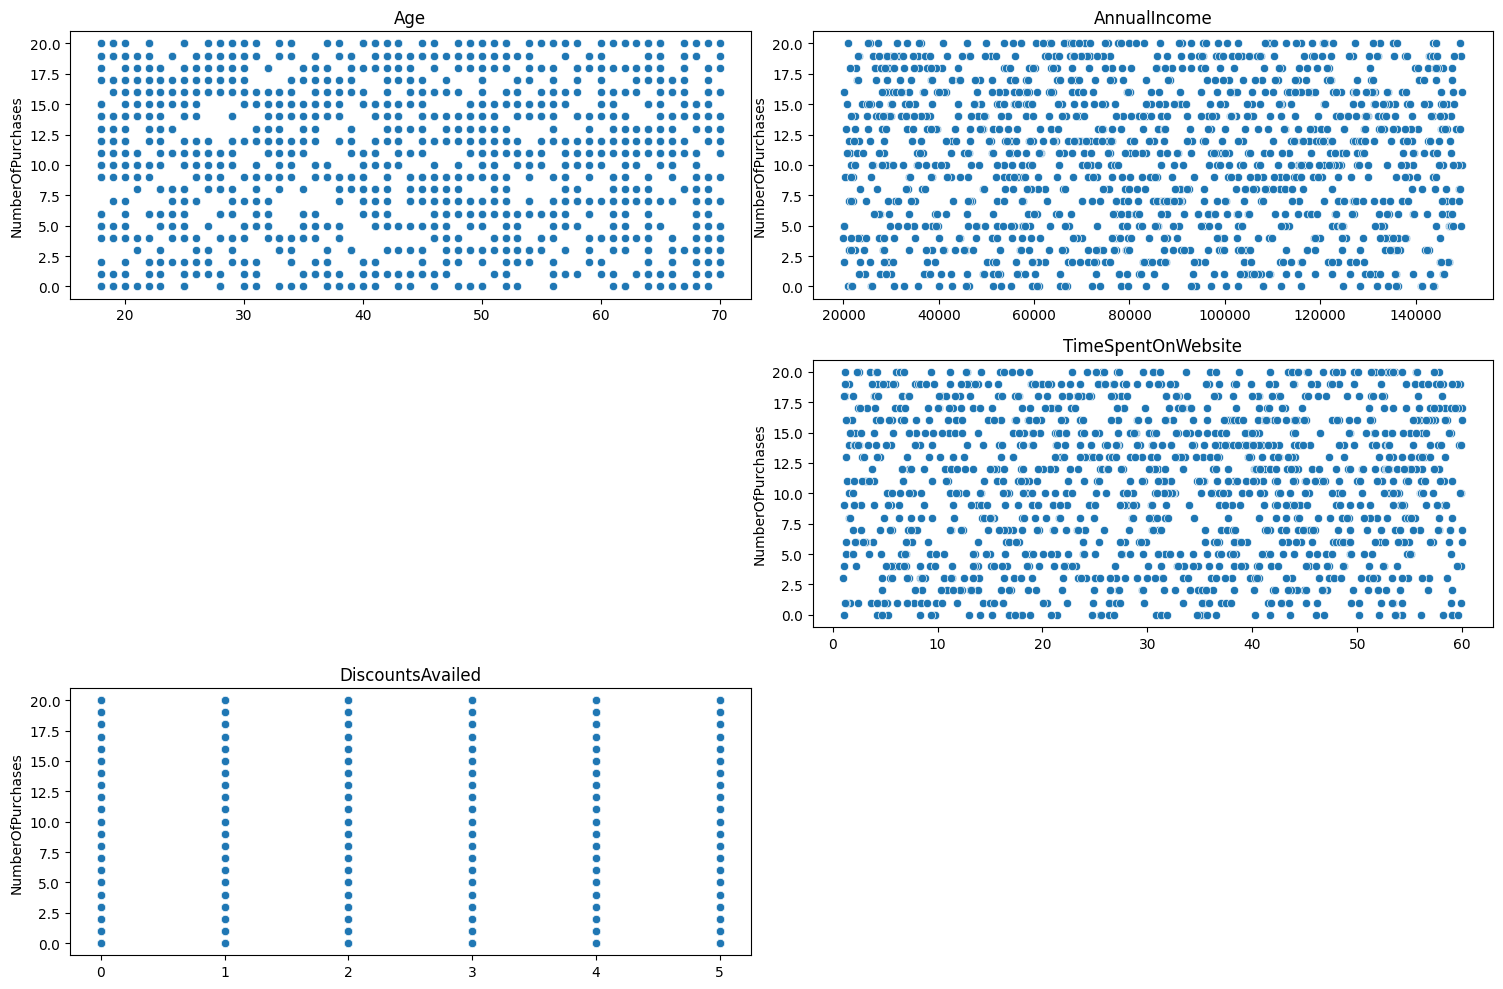

In [38]:
plot_relation_tv_numeric(df, 'NumberOfPurchases', size = (15, 10))

Vamos que no se ve nada de nada

---

### Outliers multivariados

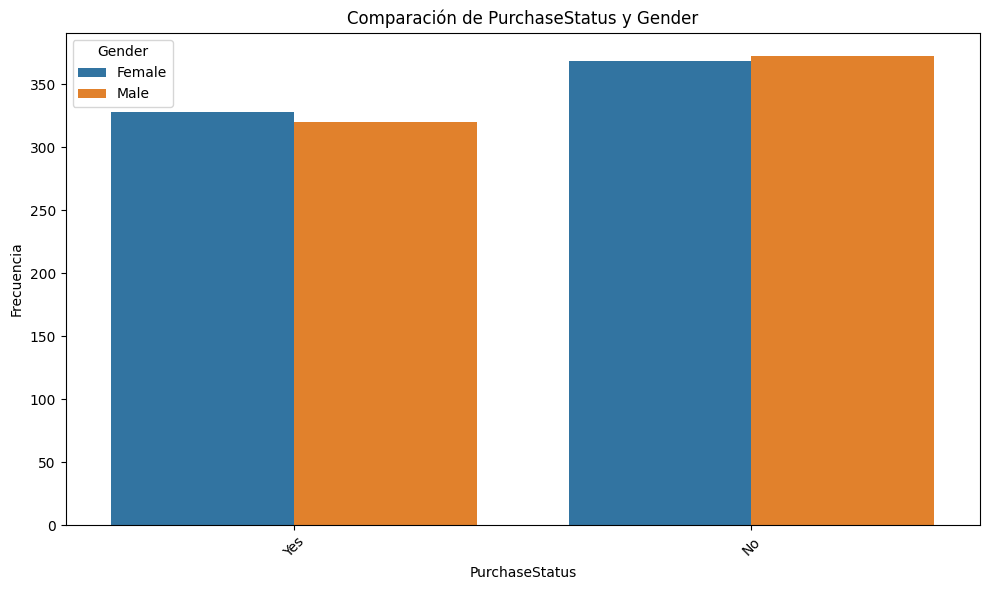

In [39]:
plot_categorical_comparison(df, 'PurchaseStatus', 'Gender', kind='count', normalize=False)

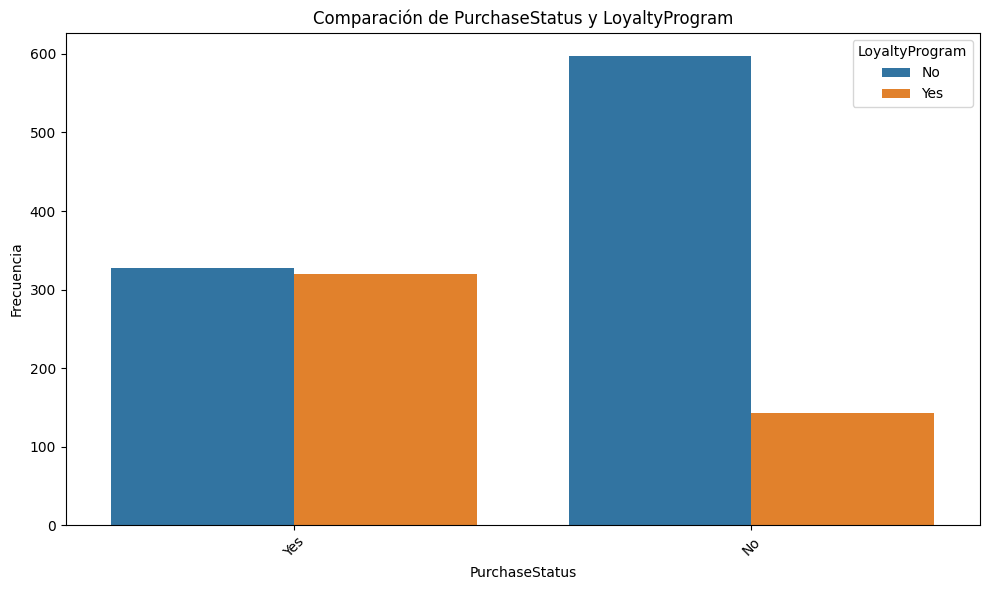

In [40]:
plot_categorical_comparison(df, 'PurchaseStatus', 'LoyaltyProgram', kind='count', normalize=False)

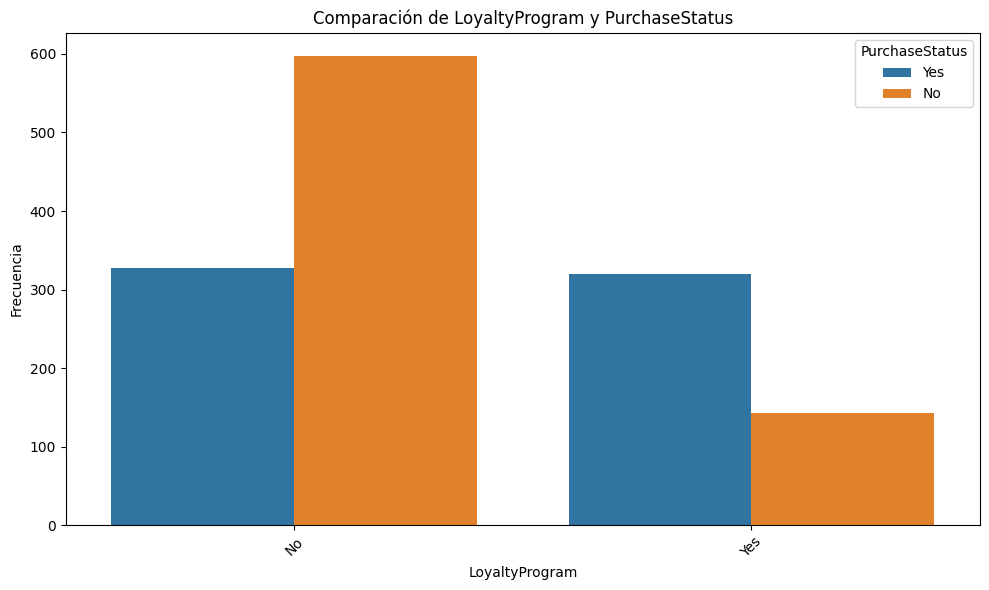

In [41]:
plot_categorical_comparison(df, 'LoyaltyProgram', 'PurchaseStatus', kind='count', normalize=False)

Entre los que no compran hay una gran diferencia de afiliados al programa Loyalty

---

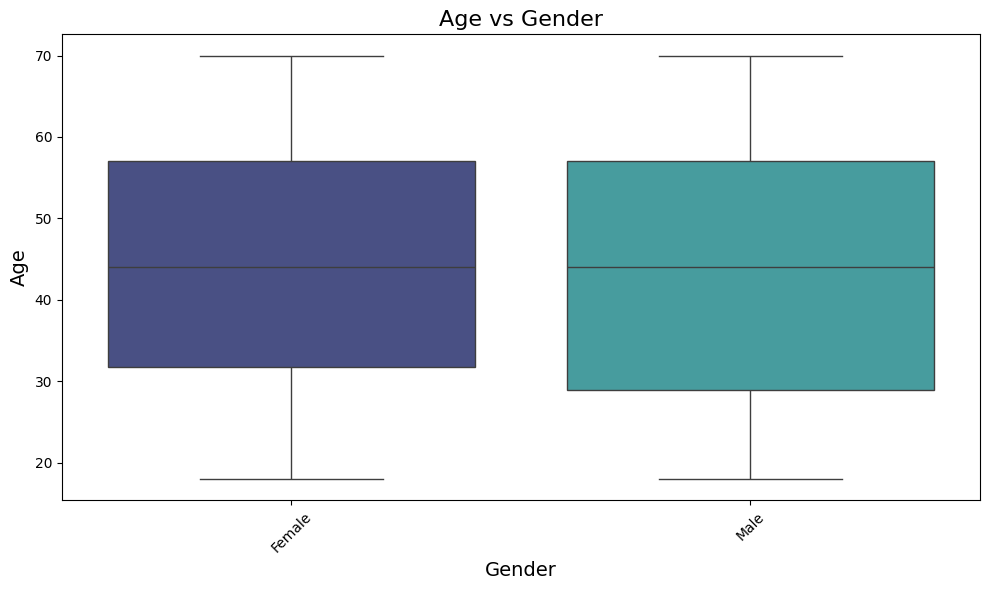

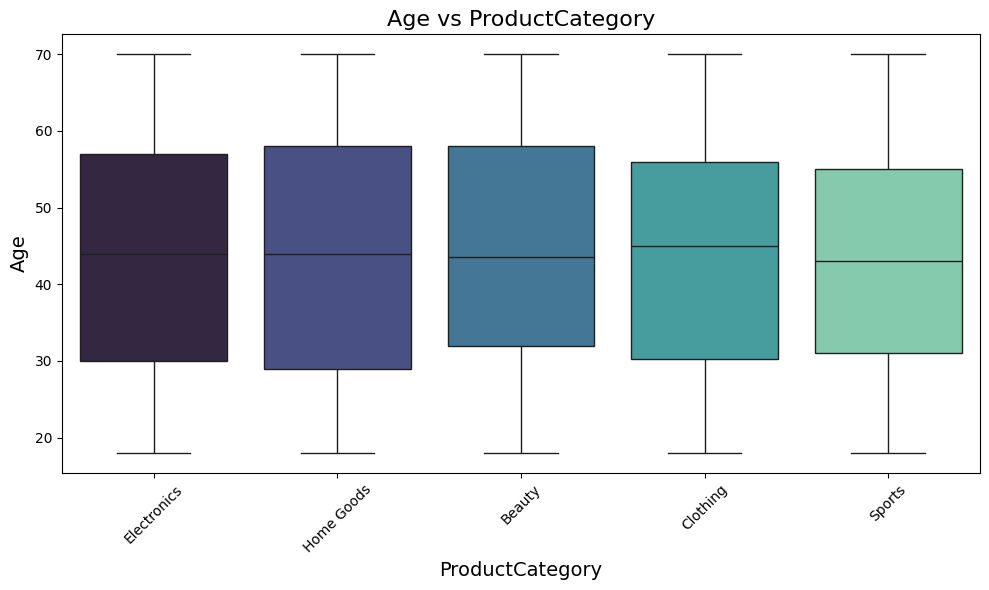

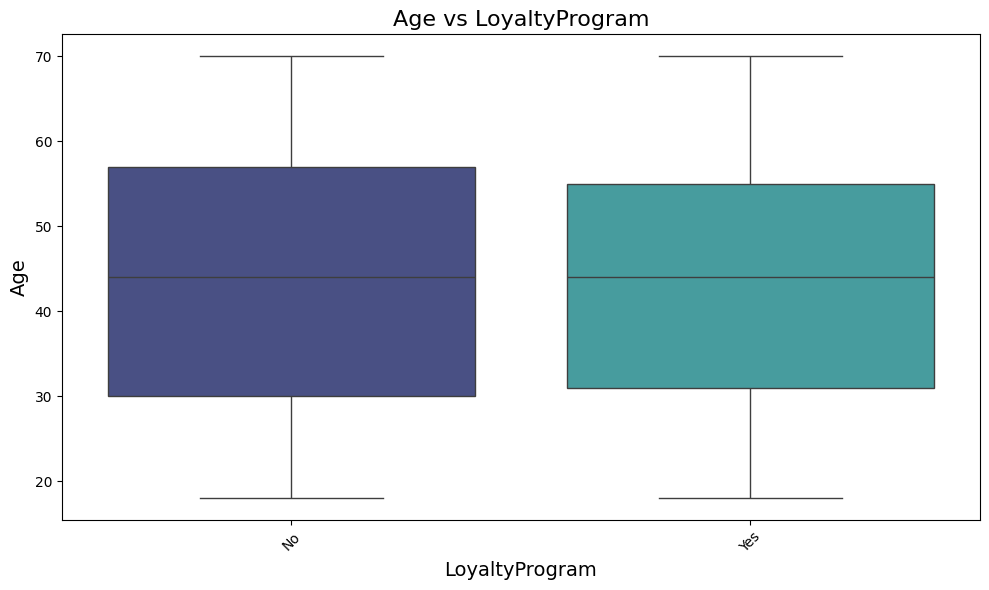

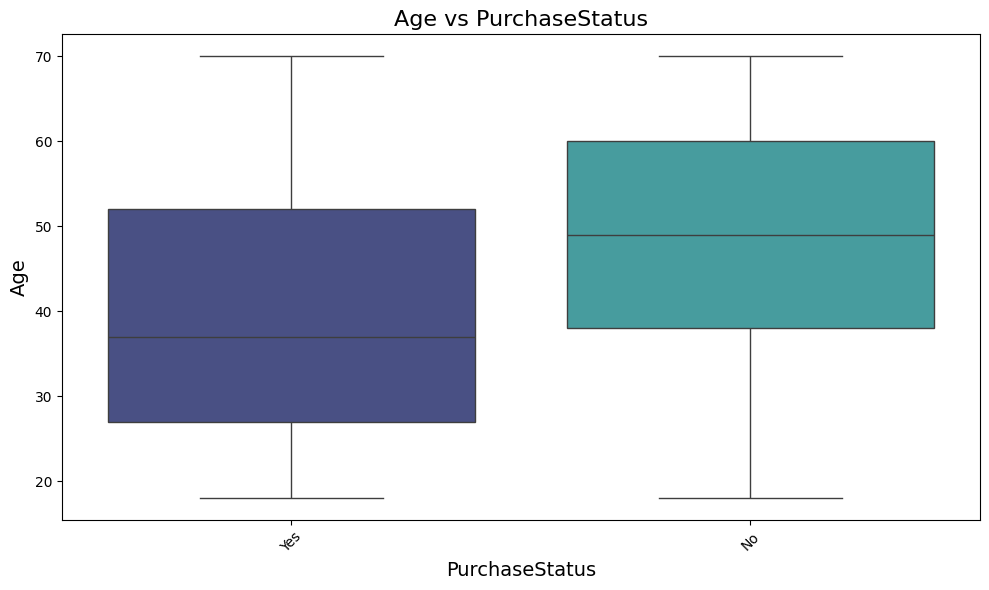

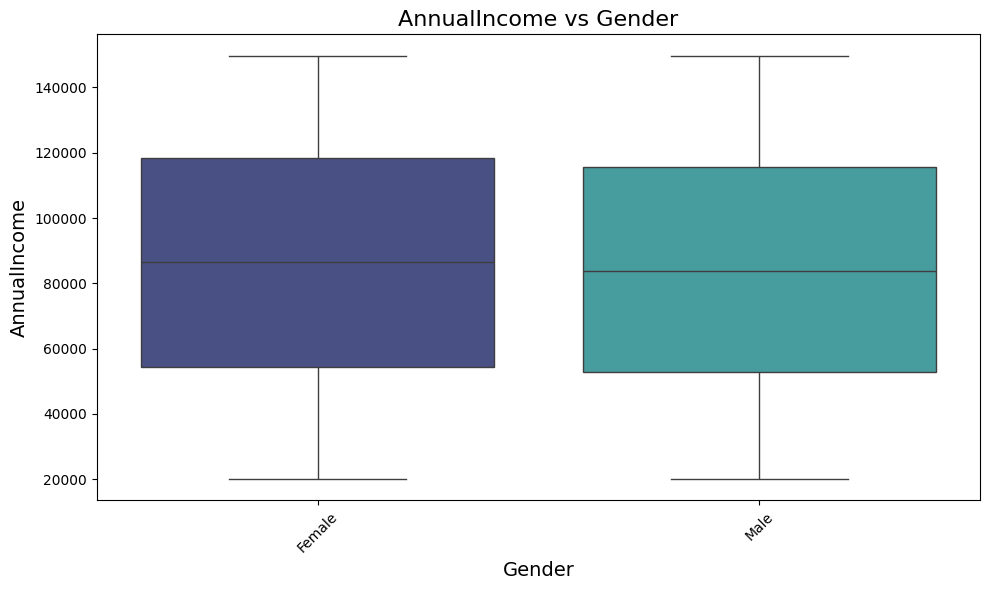

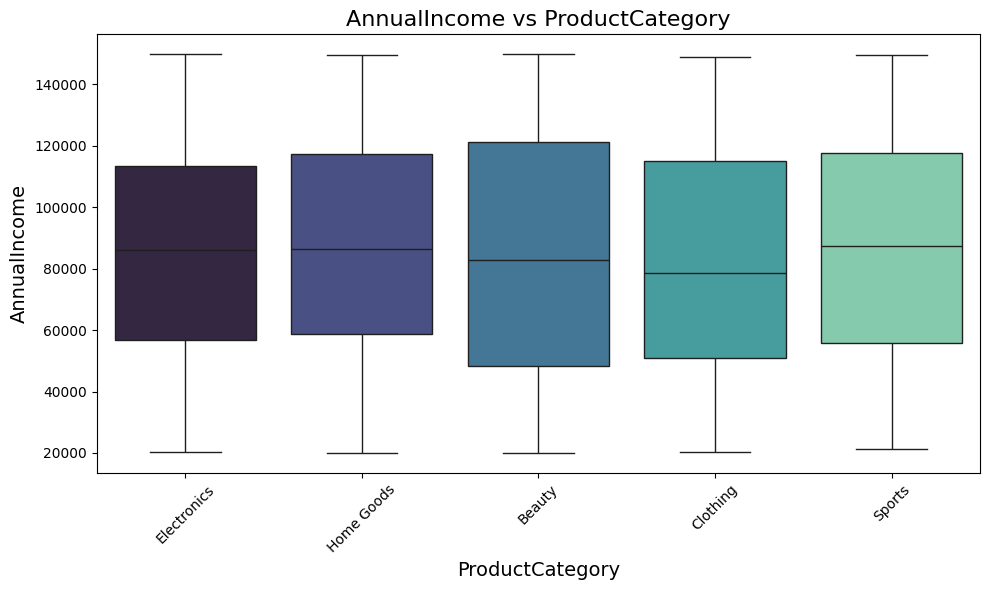

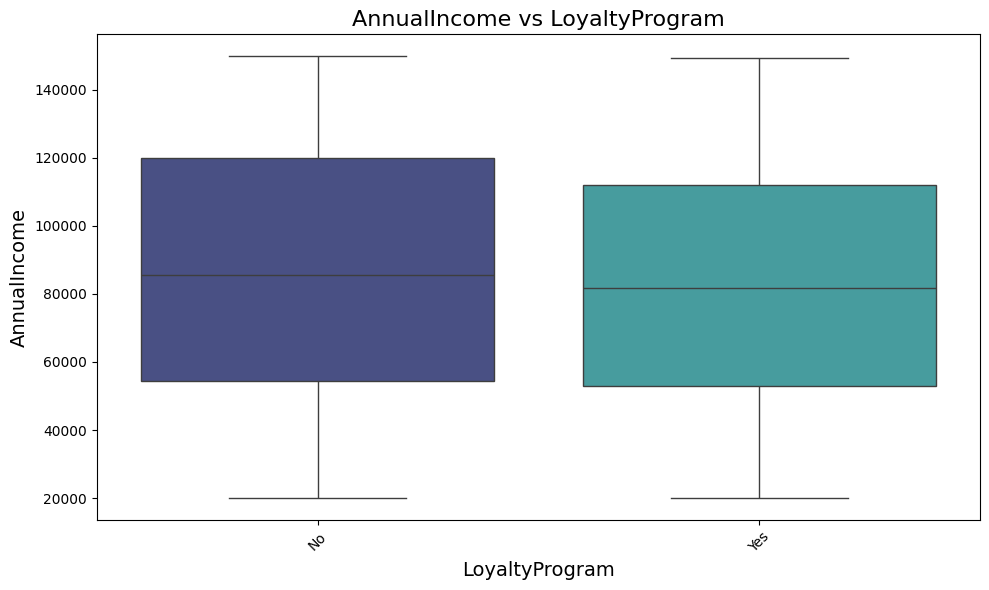

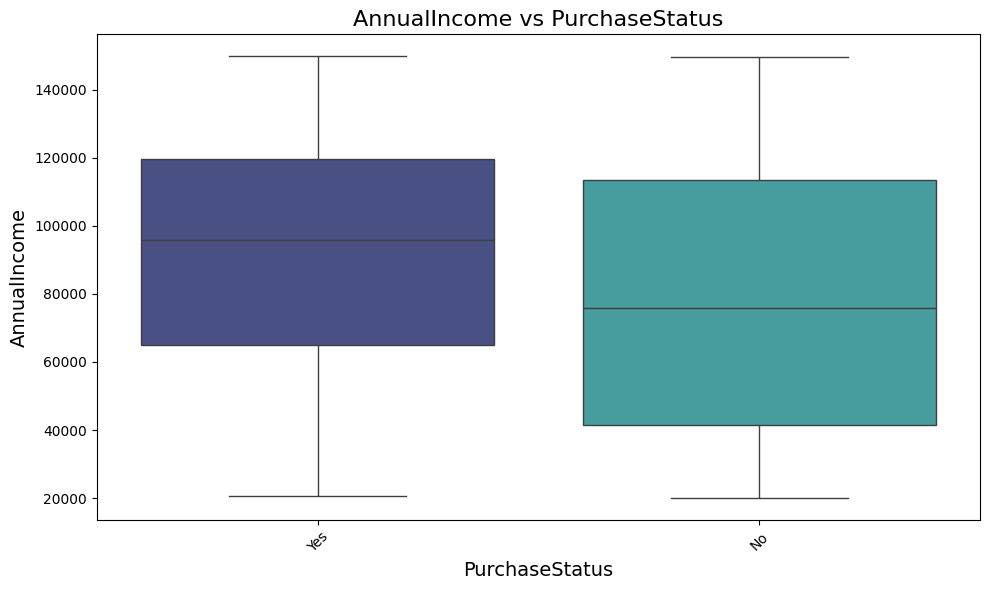

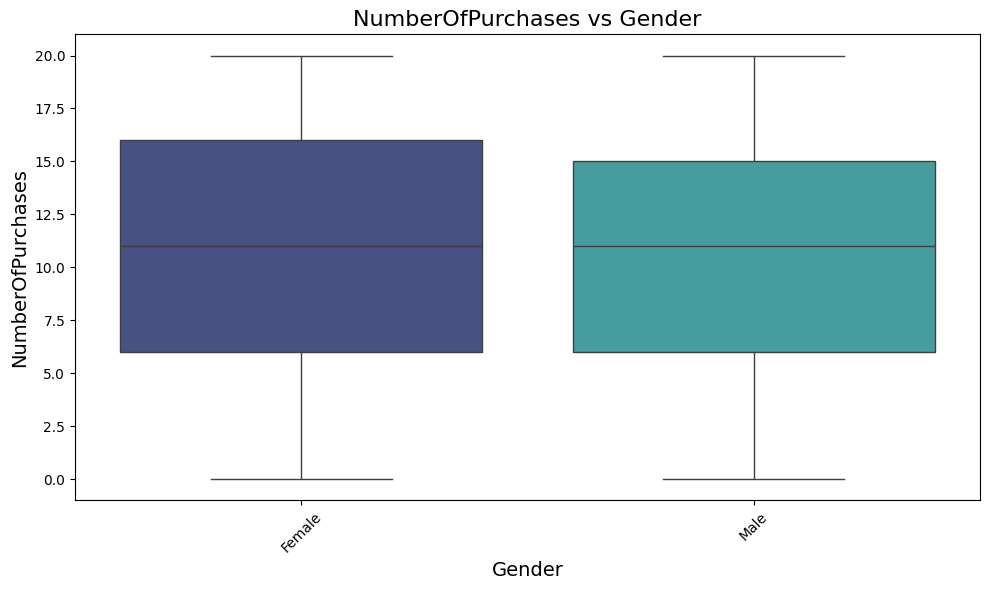

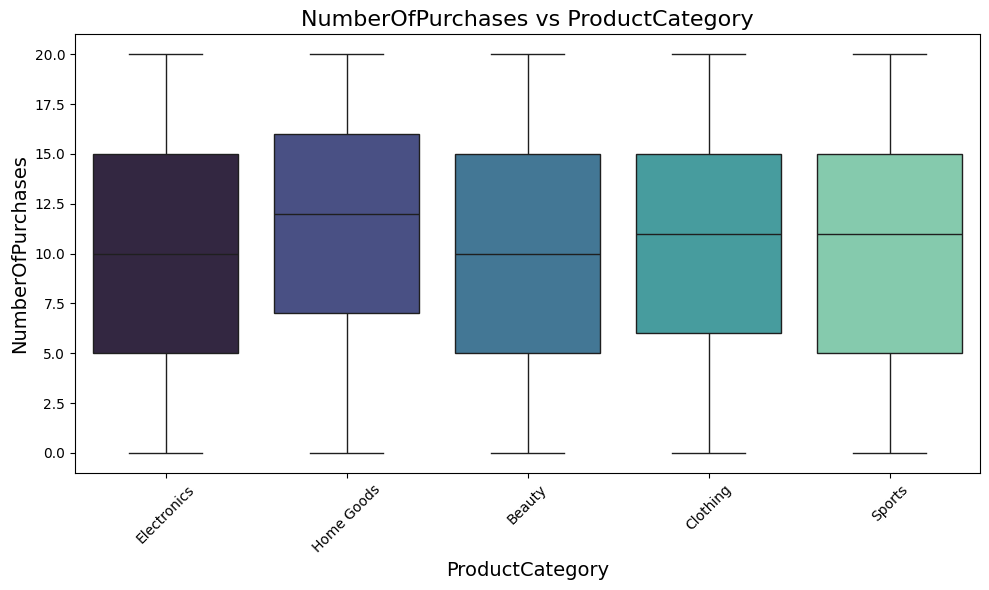

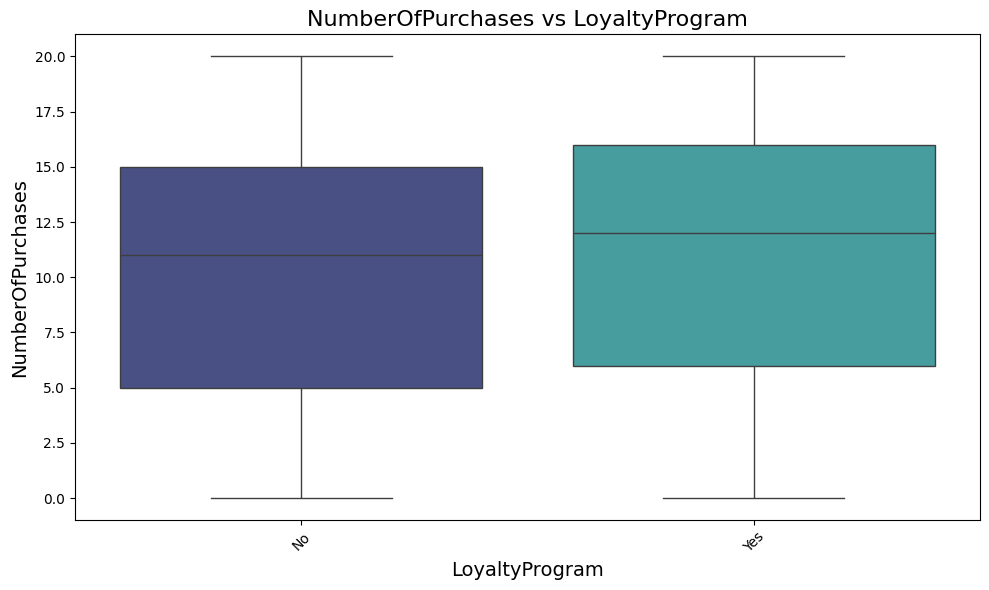

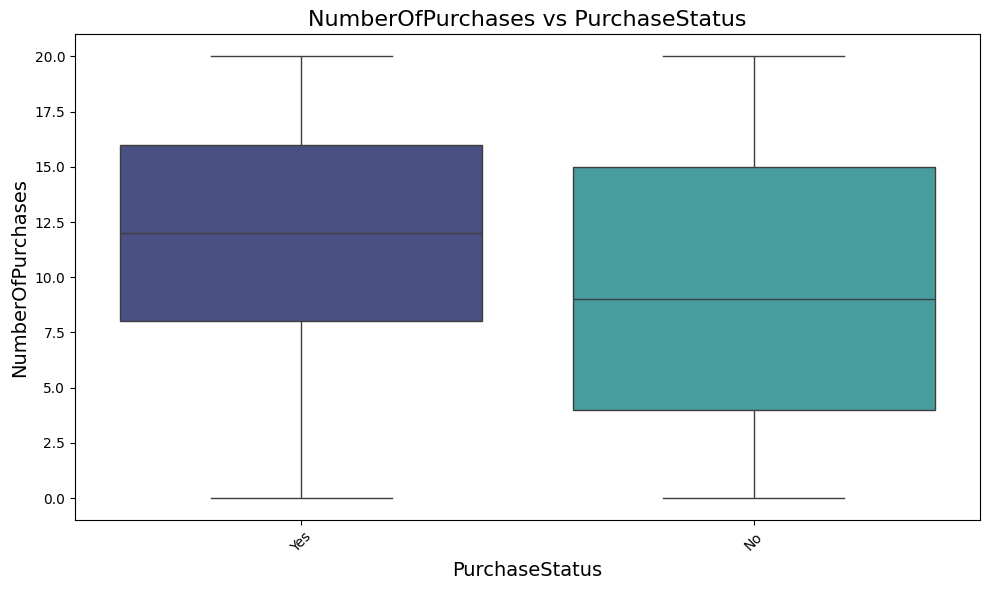

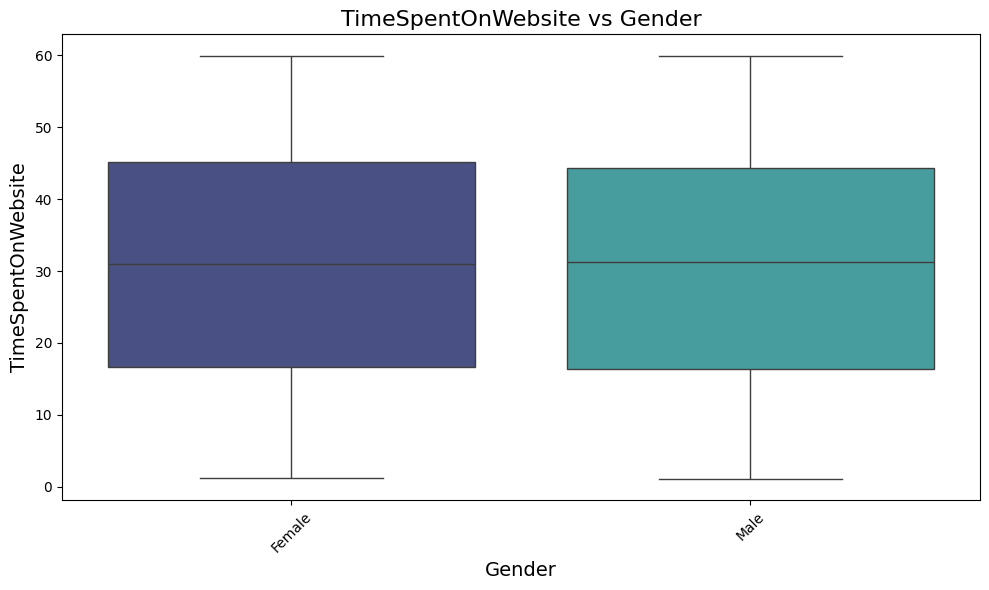

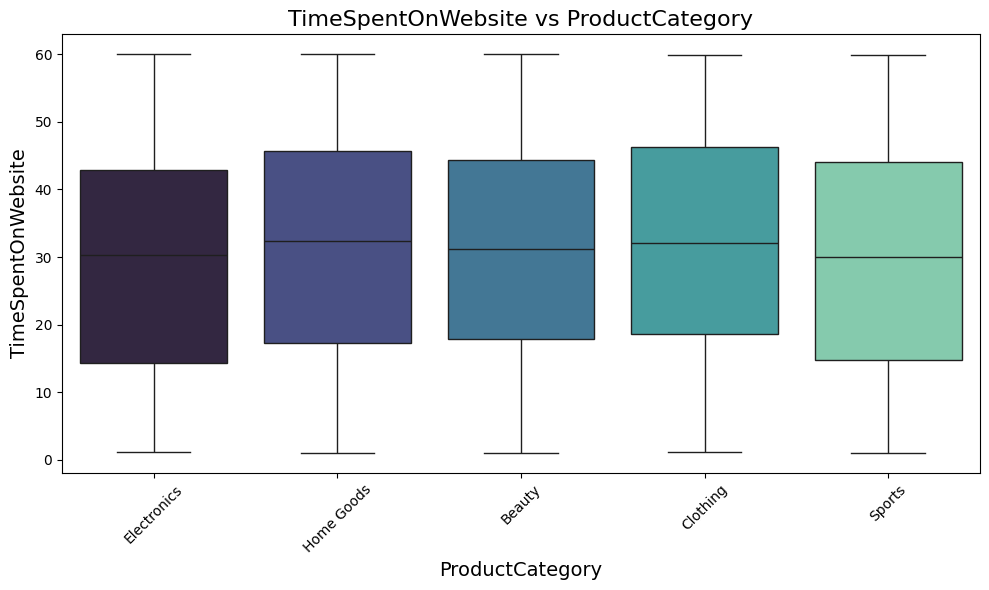

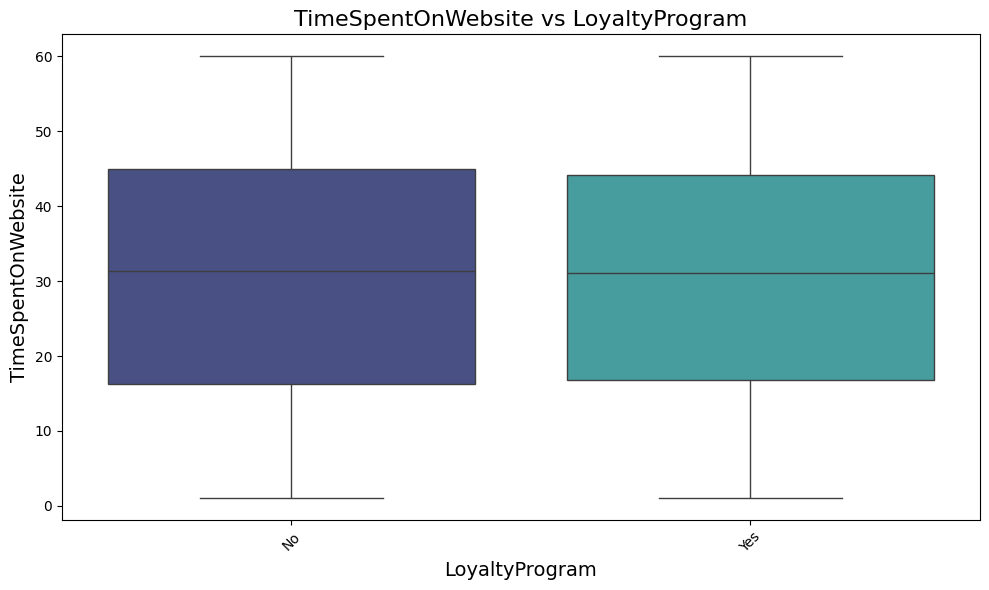

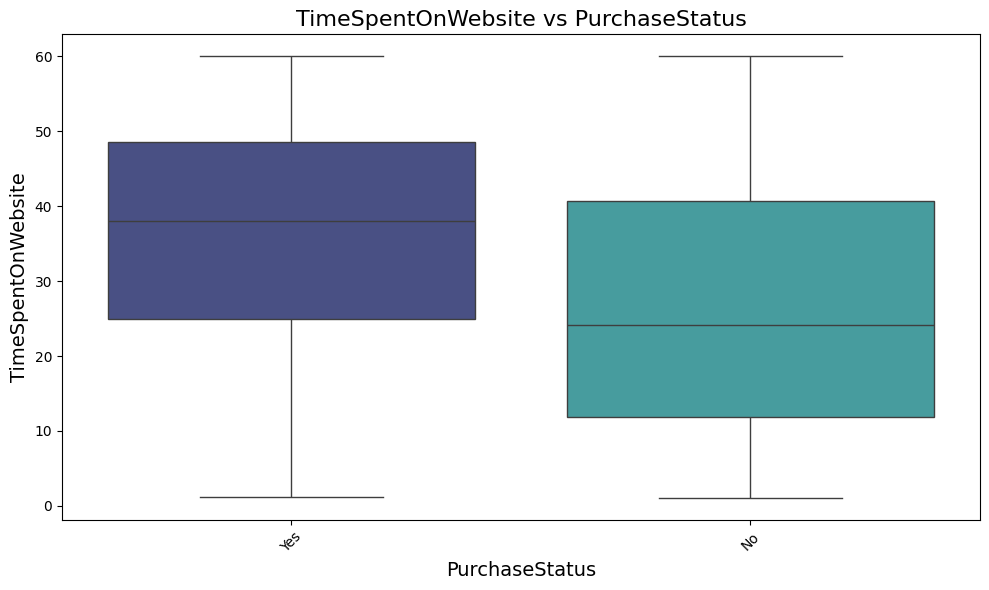

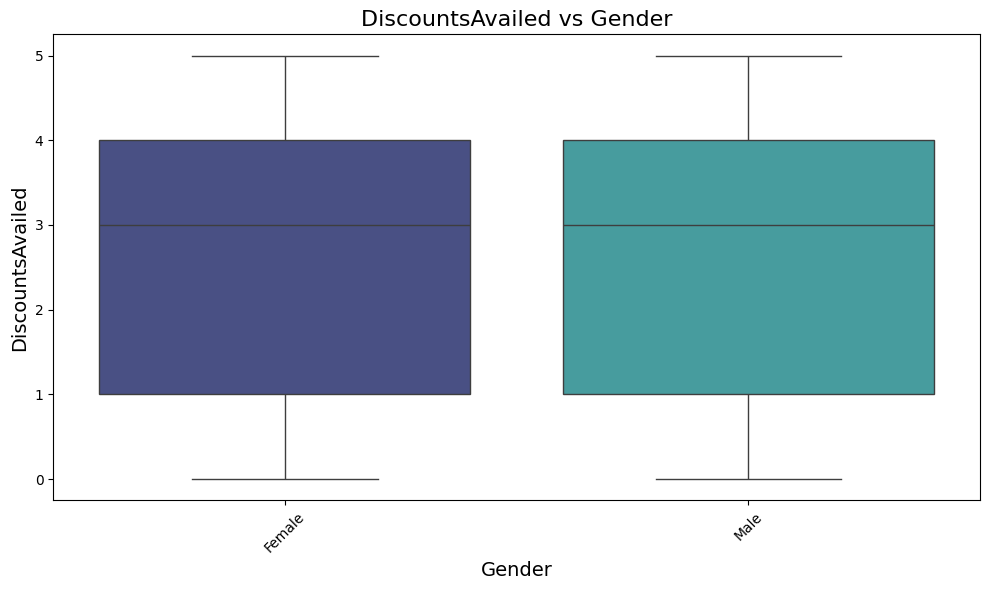

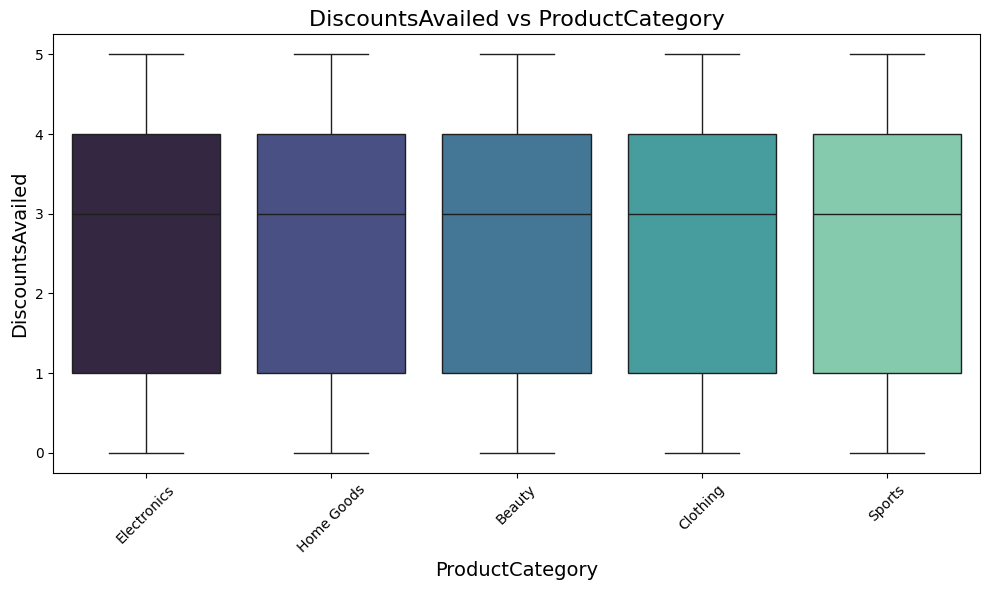

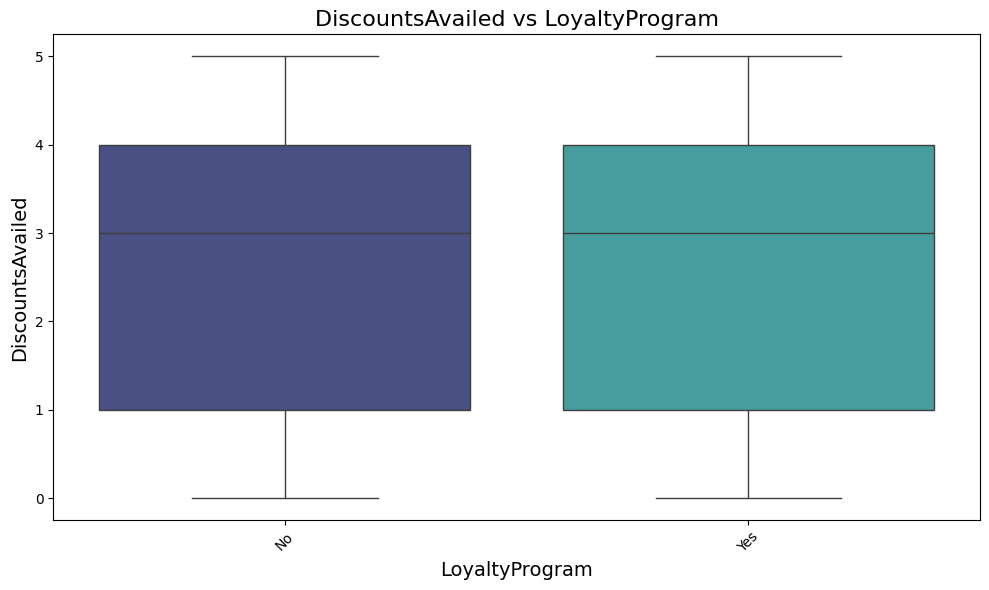

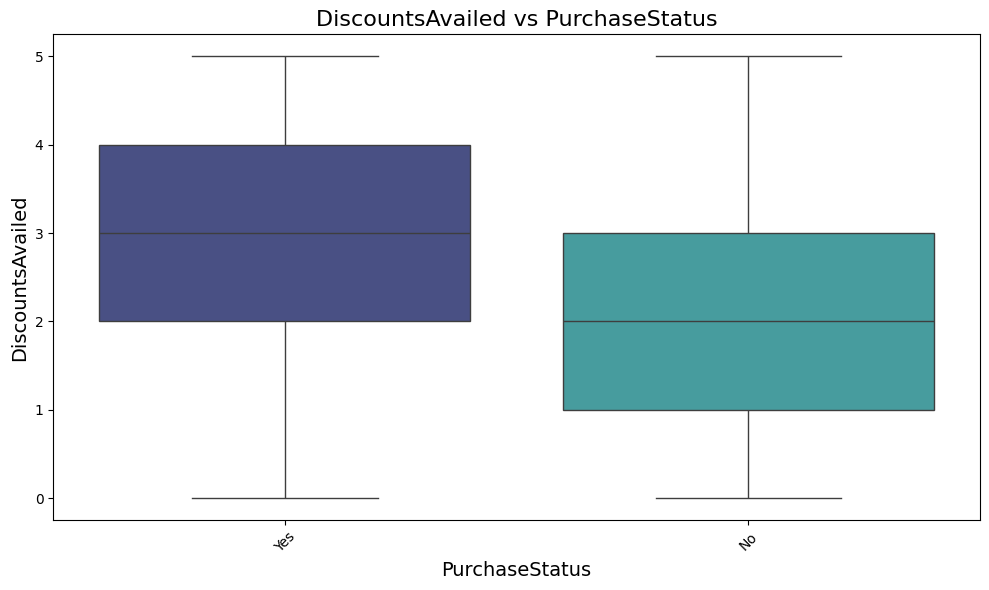

In [42]:
for col in df.select_dtypes(include=np.number).columns:

    for cat in df.select_dtypes(include='O').columns:
        boxplot_grouped(df, numeric_column=col, categorical_column=cat, title=f"{col} vs {cat}")

---

## Outliers

In [43]:
from src.soporte_outliers import GestionOutliersMultivariados, GestionOutliersUnivariados

In [44]:
gestion = GestionOutliersMultivariados(df)

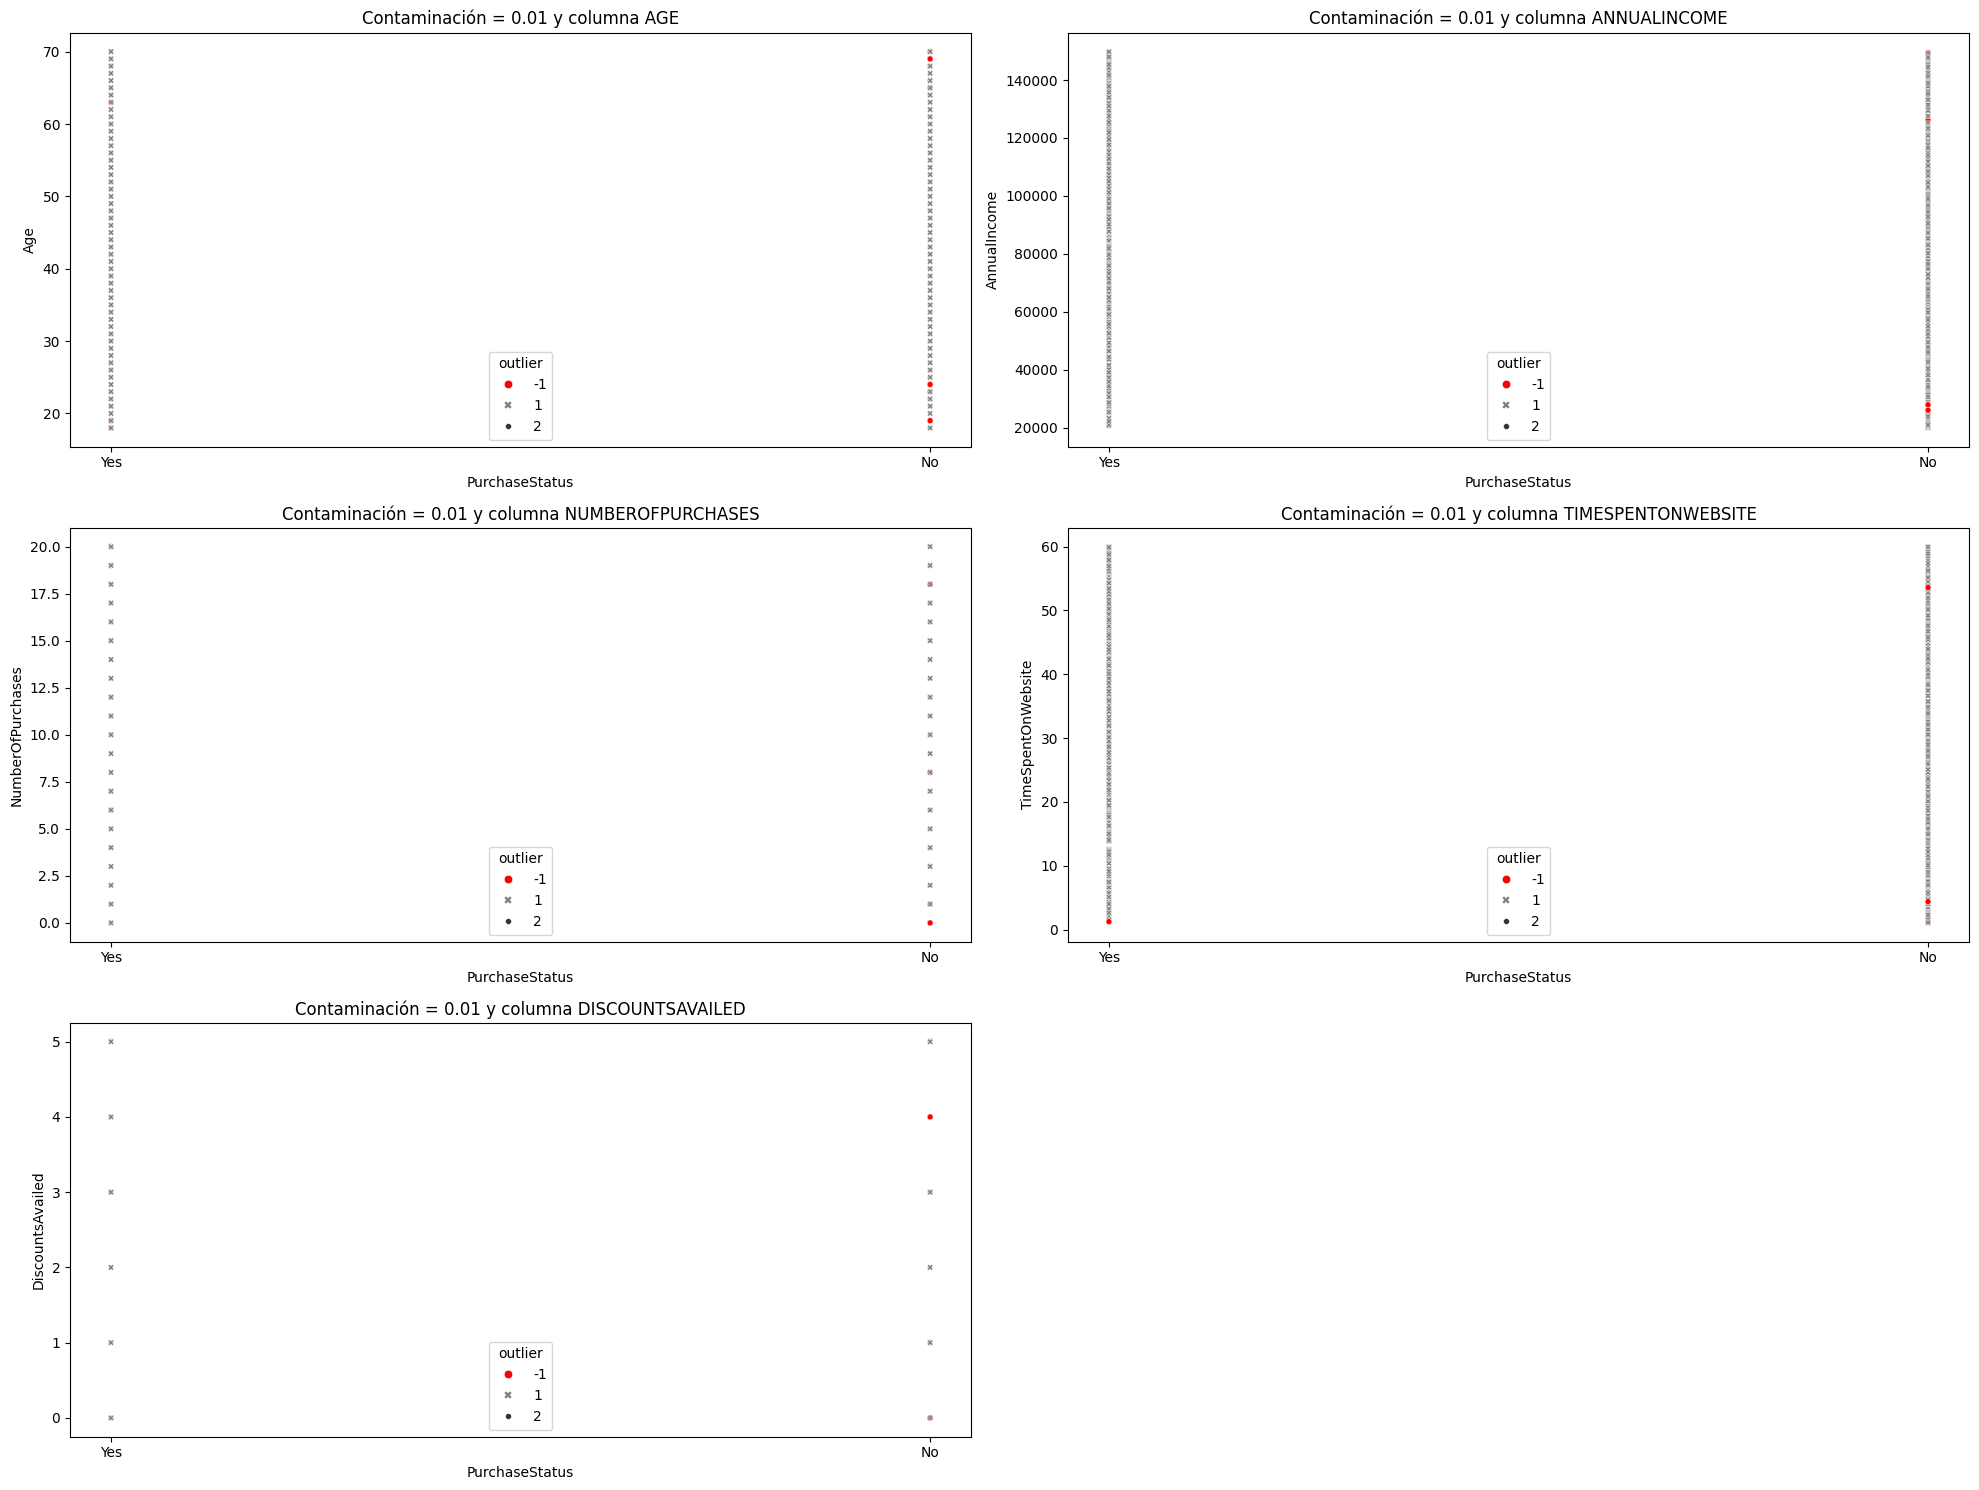

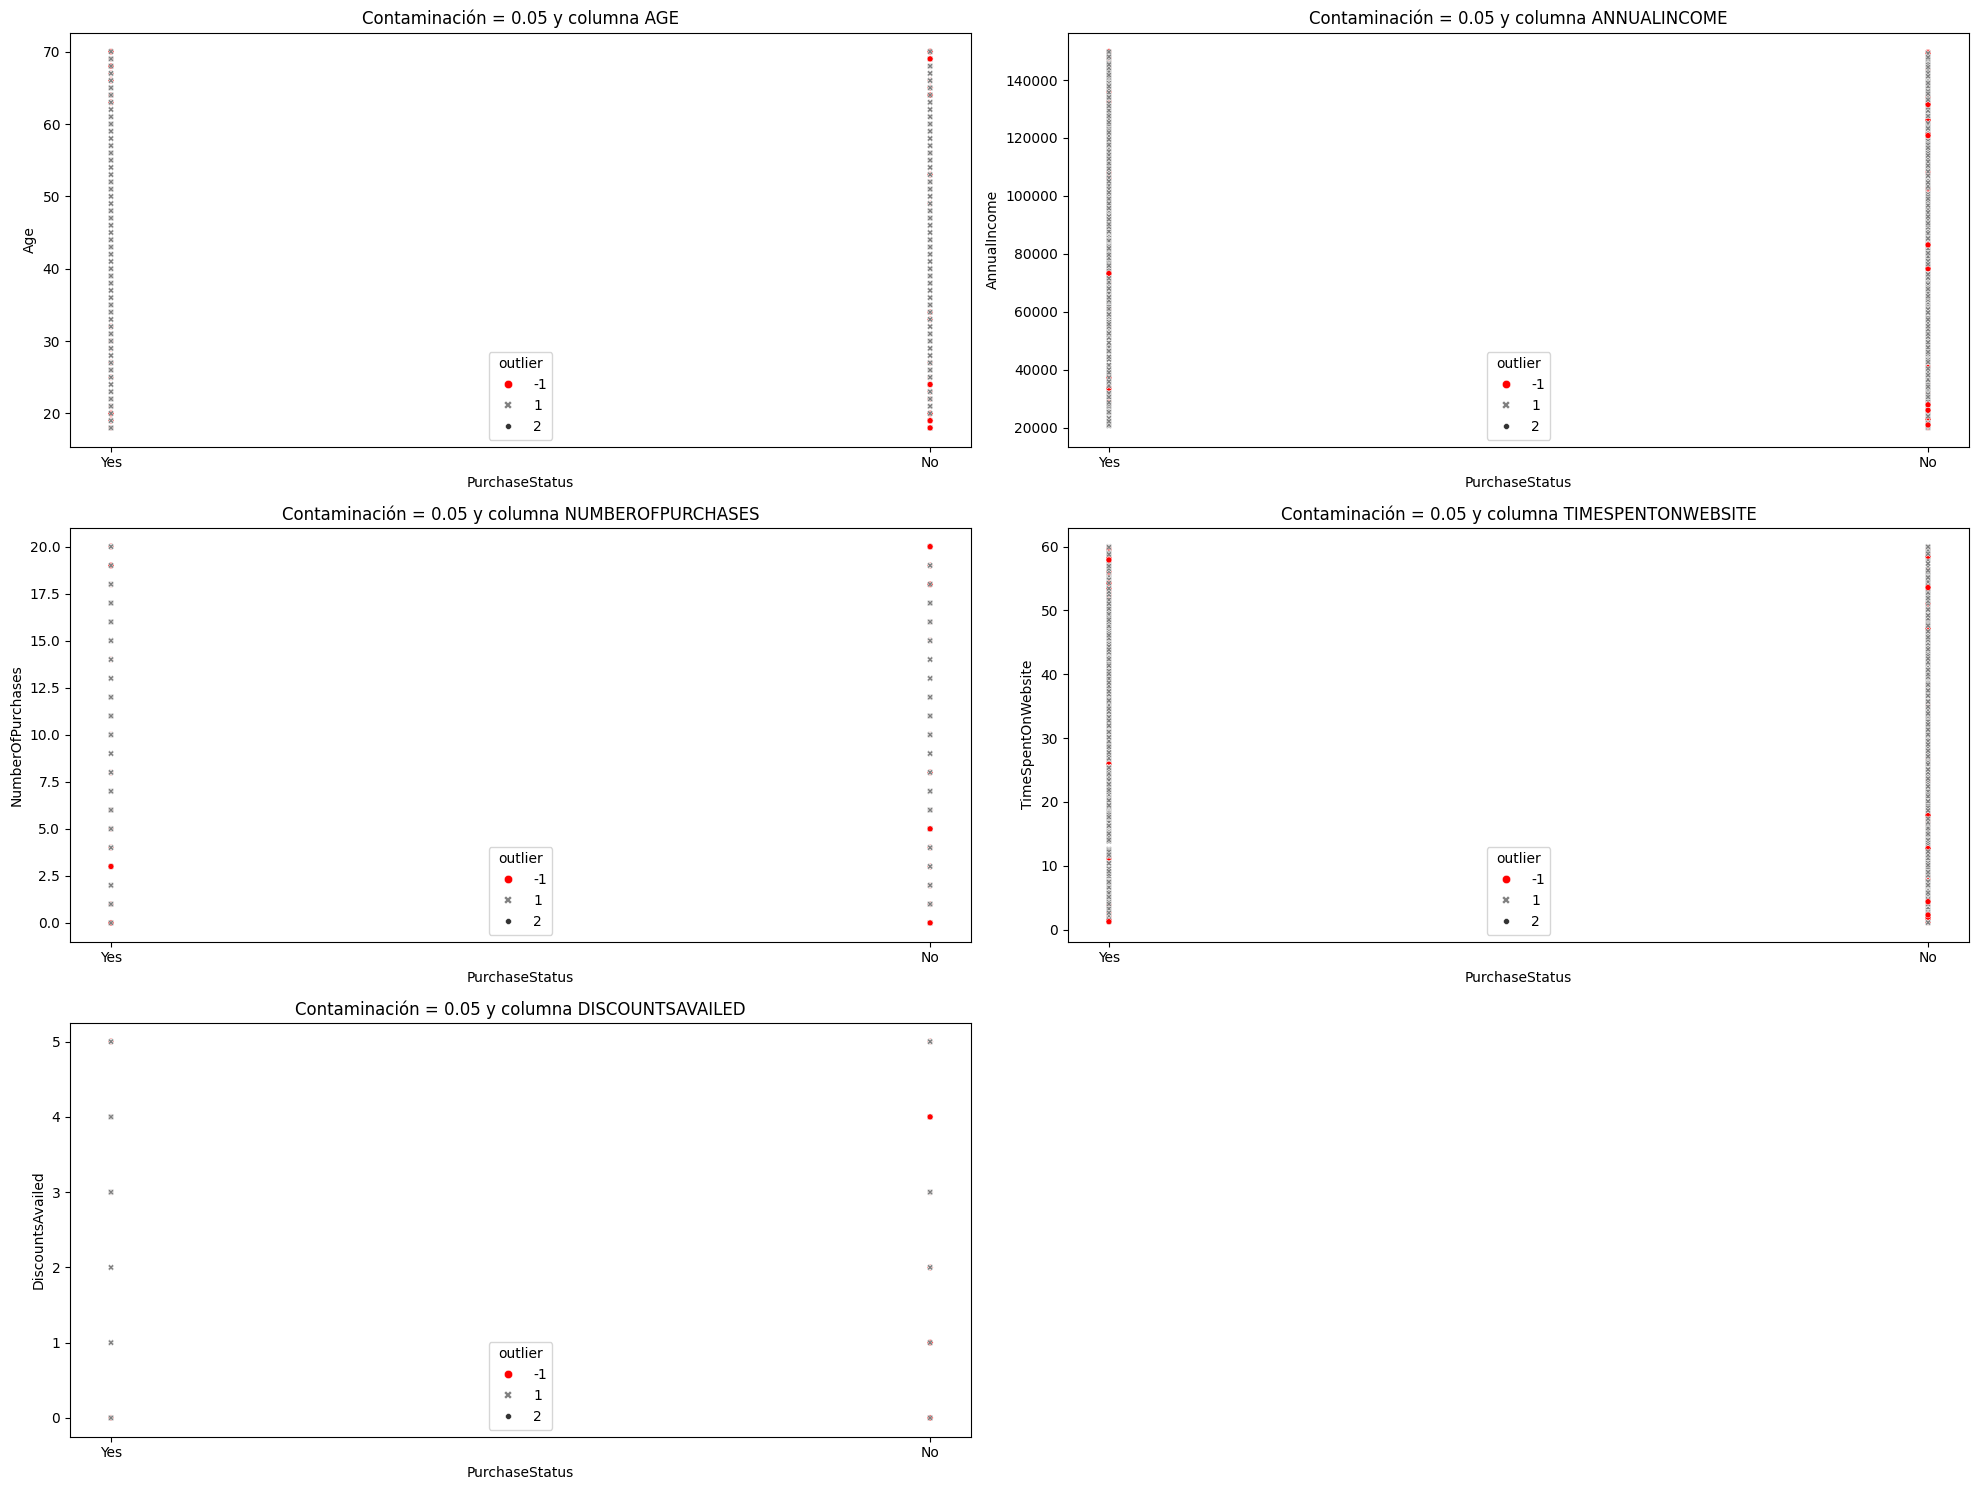

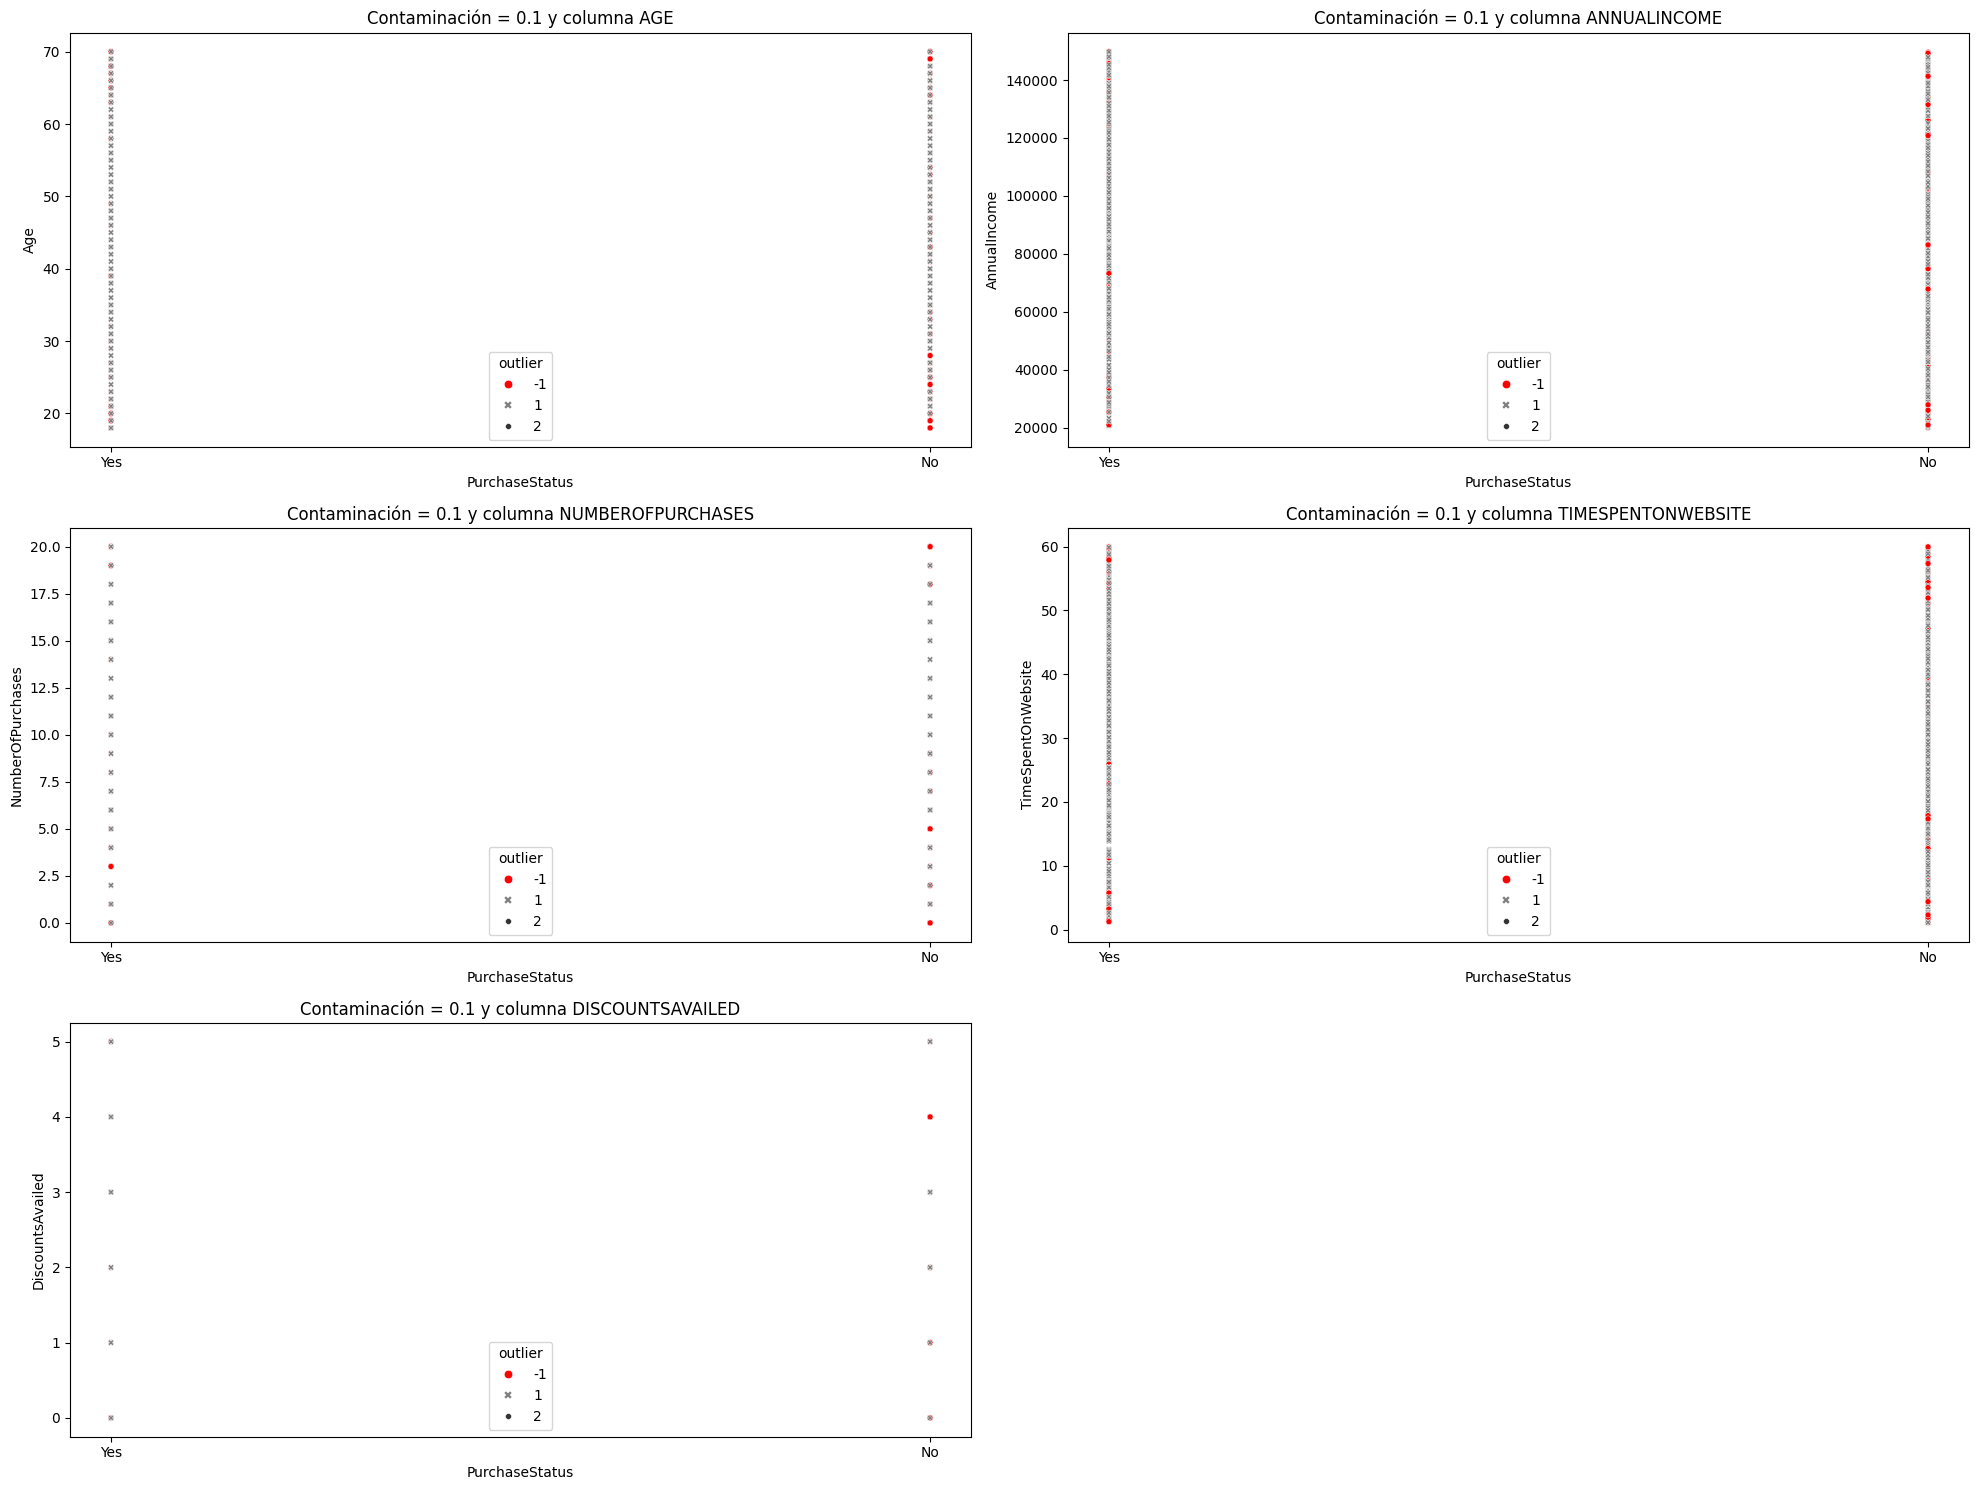

In [50]:
gestion.explorar_outliers_if('PurchaseStatus')

In [47]:
df_if = gestion.detectar_outliers_if(contaminacion=0.05)

In [51]:
df_if[df_if['outlier'] == -1]

,Age,Gender,AnnualIncome,NumberOfPurchases,ProductCategory,TimeSpentOnWebsite,LoyaltyProgram,DiscountsAvailed,PurchaseStatus,outlier
1,20,Female,23579.773583,4,Home Goods,38.240097,No,5,No,-1
17,18,Female,128374.495052,0,Home Goods,16.768262,No,4,No,-1
30,52,Female,42589.007108,1,Clothing,3.626033,Yes,5,No,-1
34,25,Male,139395.436179,1,Electronics,1.649788,No,2,No,-1
89,70,Male,85814.587734,19,Electronics,13.078448,Yes,0,No,-1
...,...,...,...,...,...,...,...,...,...,...
1435,20,Male,73251.756336,19,Beauty,57.901499,Yes,5,Yes,-1
1465,19,Male,21019.406800,20,Electronics,12.682179,No,4,No,-1
1468,69,Female,27975.451524,18,Sports,4.368566,No,0,No,-1
1489,19,Male,26090.748109,0,Home Goods,53.587522,No,4,No,-1


---

## Encoding

Test hipótesis para variables categóricas para tener un criterio para encoding

In [52]:
from scipy.stats import chi2_contingency

Creamos una tabla de contingencia

In [54]:
df_cross_tab_gender = pd.crosstab(df['Gender'], df['PurchaseStatus'])

In [55]:
df_cross_tab_gender

PurchaseStatus,No,Yes
Gender,,
Female,368,328
Male,372,320


In [56]:
chi2, p, dof, expected = chi2_contingency(df_cross_tab_gender)

Si no hubiera habido relación tendría que haber salido:

In [63]:
pd.DataFrame(expected, columns=df_cross_tab_gender.columns, index = df_cross_tab_gender.index).round(2)

PurchaseStatus,No,Yes
Gender,,
Female,371.07,324.93
Male,368.93,323.07


p-valor, si es < 0.05 es que hay diferencias entre los grupos (en este caso no)

In [61]:
p

0.7824413702843654

Valor del estadístico chi2

In [62]:
chi2

0.0762527018719174

Las variables que son "Yes"/"No" las cambiaremos por 0/1, teniendo cuidado con cuál es cuál. Debemos documentarlo de forma adecuada

In [69]:
def detectar_orden_cat(lista_cat, vr, alpha=0.05):

    for cat in lista_cat:
        print(f"Estamos evaluando la variable {cat.upper()}")

        df_cross_tab = pd.crosstab(df[cat], df[vr])

        display(df_cross_tab)

        chi2, p, dof, expected = chi2_contingency(df_cross_tab)

        if p < alpha:
            print(f"La variable {cat} SÍ tiene orden")
        else:
            print(f"La variable {cat} NO tiene orden")

Importante guardar como category en lugar de object, ya que al ser números lo entiende como tal aunque sea object

Convertimos `DiscountsAvailed` porque parece haber dos grupos (0,1,2 descuentos y 3,4,5 descuentos)

In [70]:
df['DiscountsAvailed'] = df['DiscountsAvailed'].astype('category')

In [ ]:
detectar_orden_cat(df.select_dtypes(include=['O', 'category']), 'PurchaseStatus')

Estamos evaluando la variable GENDER


PurchaseStatus,No,Yes
Gender,,
Female,368,328
Male,372,320


La variable Gender NO tiene orden
Estamos evaluando la variable PRODUCTCATEGORY


PurchaseStatus,No,Yes
ProductCategory,,
Beauty,137,133
Clothing,157,149
Electronics,152,117
Home Goods,138,116
Sports,156,133


La variable ProductCategory NO tiene orden
Estamos evaluando la variable LOYALTYPROGRAM


PurchaseStatus,No,Yes
LoyaltyProgram,,
No,597,328
Yes,143,320


La variable LoyaltyProgram SÍ tiene orden
Estamos evaluando la variable PURCHASESTATUS


PurchaseStatus,No,Yes
PurchaseStatus,,
No,740,0
Yes,0,648


La variable PurchaseStatus SÍ tiene orden


¿Vale, pero cómo encodeamos?

Recomendación

* Frequency: Usa value_counts(). Empezar por este.

* Target: Usa los valores de cross_tab(). Alternativa.

---

### Desbalanceo de los datos

Cuando uno de los valores de una categoría (solo en la variable respuesta) tiene muchas más entradas que la otra (o las otras) decimos que la variable está desbalanceada por lo que el modelo puede estar sesgado.

Esto es la única modificación que vamos a hacer en la variable respuesta.

Tenemos dos opciones:

+ Upsampling: la categorái menor la aumentamos al mismo tamaño que la otra

    + Con `pandas` podemos duplicar datos (mal)

+ Downsampling: la categoría mayor la reducimos al mismo tamaño que la otra

    + Con `pandas` podemos usar `df.sample()` (mal)

`imb_learn` hace algo parecido a lo de `pandas` pero mejor:

+ `SMOTE` (up)

+ `tomeklink`(down)

+ `SMOTE tomelink` (up-down)

Generan registros nuevos al estilo KNN para up o elimina registros muy parecidos para down, lo que es algo mejor

¿Cuándo hacerlo?

Es adecuado para un desbalanceo a partir de 65-35, aunque lo mejor suele ser lanzar el modelo y usar la corrección del desbalanceo para mejorar las métricas si es necesario

### IMPORTANTE

SMOTETomek da problemas si le pasamos variables codificadas porque solo acepta números. Si lo hacemos después del encoding nos genera más valores únicos y pierde el sentido dando lugar a peores resultados.

La mejor solución:

* SMOTE (subir): tenemos un método que es SMOTENC que nos permite introducir variables categóricas (hay que hacerlo antes del encoding)

* Hacer encoding

* Usar Tomek (bajar) si lo vemos necesario en lugar de subir toda la minoritaria